## Bsc Computer Science 
## CM3005 Data Science 
## Linear Regression Analysis on Vehicle Dataset

## 1. Introduction 

This coursework embarks on a journey into the realm of automotive commerce, seeking to leverage the power of machine learning, particularly the Linear Regression algorithm, to address a pressing issue within the used car market.

#### Domain Specific Area

The chosen domain for this project is the used car market, a dynamic sector influenced by various factors ranging from vehicle specifications to market trends. In an era marked by the production of approximately 92 million cars in 2019, the surge in demand for used cars has established this market as a burgeoning industry. The primary objective is to develop a robust Linear Regression model capable of predicting the resale value of used cars.

#### Objectives of the Project

The overarching goal is to unravel the intricate web of factors influencing the pricing of used cars, providing a reliable and data-driven approach to determine their market value.Specifically, the project aims to employ advanced statistical and machine learning methodologies to identify meaningful patterns and correlations among various features, such as km_driven, seller_type, mileage and torque. 

#### Impact and Contribution to the Domain

The impact of this project extends beyond the confines of academia, directly addressing the practical needs of the used car market. By introducing a machine learning-based approach to predict resale values, the project contributes to the enhancement of decision-making processes for both sellers and buyers. Sellers can now make more informed decisions regarding pricing, while buyers gain insights into the factors influencing the cost of a used car. The predictive model serves as a valuable tool for assessing the worthiness of a used car based on its features, fostering a more informed approach to buying and selling decisions.

Hence, the objectives outlined align with the broader goal of advancing decision-making processes in this dynamic sector, ultimately contributing to the efficiency and transparency of the used car industry.

## 2. Dataset Description

For our expedition into predicting used car prices, we have curated a comprehensive dataset that encapsulates the essence of the automotive market.

#### Attributes and Structure

The dataset consists of 13 columns, each representing a specific attribute or characteristic of the listed used cars.

These attributes include:

<b>name:</b> The specific model or brand.

<b>year:</b> The year in which the car was purchased.

<b>selling_price:</b> The price at which the owner intends to sell the car.

<b>km_driven:</b> The distance covered by the car in kilometers.

<b>fuel:</b> The type of fuel the car utilizes.

<b>seller_type:</b> Whether the seller is a dealer, an individual or others.

<b>transmission:</b> Whether the car has a manual or automatic transmission.

<b>owner:</b> The number of previous owners.

<b>mileage:</b> The fuel efficiency or distance covered per unit of fuel. 

<b>engine:</b> The car's engine specifications.

<b>max_power:</b> The maximum power produced by the car's engine. 

<b>torque:</b> The rotational force produced by the engine.

<b>seats:</b> The seating capacity of the car. 

#### Data Types and Size

This dataset exhibits a rich variety of data types, including numerical, categorical, and text-based information. TThe diversity in data types is a boon, allowing for a nuanced analysis that captures the multifaceted nature of the used car market.

#### Data Acquisition

The dataset's origins trace back to the web portal of Kaggle.com, a prominent platform offering a myriad of datasets for diverse domains. Specifically sourced from cardekho, a trusted platform for buying and selling cars, this dataset captures real-world data. 

## 3. Data Preparation

Data preparation aims to improve the quality and reliability of the data, making it ready for further exploration, analysis, or machine learning tasks.

It involves cleaning and transforming raw data into a format suitable for analysis and model training. This process is essential as real-world data is often messy, incomplete, or in a format that is not directly usable for analysis or modelling.

### 3.1 Importing Dependencies

In [1]:
# Data manipulation and analysis
import pandas as pd                # For data manipulation and analysis using DataFrames
import numpy as np                 # For numerical operations

# Data visualization
import matplotlib.pyplot as plt    # For creating static, interactive, and animated visualizations
import seaborn as sns              # For statistical data visualization based on matplotlib

# Statistical tests and transformations
from scipy.stats.mstats import normaltest   # For testing the normality of a sample distribution
from scipy.stats import boxcox             # For Box-Cox power transformation

# Statistical measures and preprocessing for regression
from scipy.stats import skew                    # For calculating the skewness of a dataset
from sklearn.preprocessing import LabelEncoder # For label encoding categorical variables

# Regression-related libraries
from sklearn.model_selection import train_test_split     # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler         # For standardizing feature values
from sklearn.linear_model import LinearRegression        # For implementing linear regression models
from sklearn.model_selection import cross_val_score       # For cross-validation of regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Regression evaluation metrics
from sklearn.model_selection import GridSearchCV          # For hyperparameter tuning using grid search
from sklearn.preprocessing import PolynomialFeatures     # For generating polynomial features

# Column transformation and preprocessing pipelines
from sklearn.compose import ColumnTransformer   # For applying different transformations to different columns
from sklearn.pipeline import Pipeline           # For constructing a pipeline of data transformations
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For standardization and one-hot encoding

# Warning control
import warnings
warnings.filterwarnings('ignore')    # To suppress warnings during code execution

### 3.2 Importing Raw Data

In [2]:
# Load the raw dataset
rawData = pd.read_csv('carDetails.csv')

We have loaded the CSV file and we can now perform preliminary exploration so as to understand the structure and characteristics of the dataset.

### 3.3 Exploring Raw Data

In [3]:
# Display the dataset
rawData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Get information about the dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


The data comprises of 8128 entries with 13 columns and there are mainly three types of data types - Integer ('int64'), Float('float64'), and Object('object').

We can also observe that all the features have 'non-null' entries except for 'mileage', 'engine', 'max_power', 'torque', and 'seats'. This suggests that there are some missing values in the vehicle dataset. 

In [5]:
# Generate descriptive statistics of the dataset
rawData.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### 3.4 Data Cleaning and Preprocessing

### Handling Missing Values 

In [6]:
# Get information on Missing Values
rawData.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
# Identify missing values
rawData[rawData.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows with missing valuesb
rawData = rawData.dropna().reset_index(drop=True)

The above set of codes identifies rows with all the missing values. It can be observed that all the missing values are present in the same rows across multiple columns. 

Thus, these columns are dropped. 

### Handling Duplicate Values 

In [9]:
# Identify duplicates 
rawData.duplicated().sum()

# Drop rows with duplicate valeus 
rawData.drop_duplicates(inplace=True)

In [10]:
# Create a new DataFrame
data = rawData.copy()

# Get information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 7903
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


The above set of code identifies rows with duplicate values and drops the row. A new data frame is also created as a copy of the modified dataframe. 

The cleaned dataset now has 6717 entries with 13 columns. Non-null counts have also been checked, confirming no missing values. 

### Handling Inconsistent Values 

In [11]:
# Extracts numeric values and converts them to float data type
data['max_power'] = data['max_power'].str.extract(r'(\d+\.*\d*)').astype(float)

# Extracts numeric values and converts them to float data type
data['mileage'] = data['mileage'].str.extract(r'(\d+\.*\d*)').astype(float)

# Extracts numeric values and converts them to float data type
data['engine'] = data['engine'].str.extract(r'(\d+\.*\d*)').astype(float)

# splits the column into two columns ('torque' and 'rpm')
data[['torque', 'rpm']] = data['torque'].str.split('/|@|at', n=1, expand=True)

# Drops the 'rpm' column
data = data.drop('rpm', axis=1)

# Extracts numeric values and converts them to float data type
data['torque'] = data['torque'].str.extract(r'(\d+\.*\d*)').astype(float)

# Applies a conditional transformation to the 'torque' column. 
# If the torque value is less than or equal to 50, 
# it is multiplied by the gravitational constant (9.81), otherwise, it remains unchanged.
data['torque'] = data['torque'].apply(lambda x: 9.81*x if x <= 50 else x)

The vehicle dataset has columns, 'mileage', 'engine', 'max_power', and 'torque' that contains string characters.

The numeric values of the above mentioned columns are extracted and and are converted to float data types.

The 'torque' column is split into two columns - 'torque; and 'rpm'. Following that, the torque values are retained and converted to float.

The code also applies a conditional transformation to adjust torque values.

In [12]:
# Disply the dataset
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.587,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.744,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.815,5.0


### Handling Alphanumeric Characters 

In [13]:
# Computue number of unique values
data['name'].nunique()

1982

In [14]:
data['name'] = data['name'].str.extract(r'(\w+)')

# Compute number of unique values
data['name'].nunique()

31

The above set of code, cleans and transforms the 'name' column by removing special characters and retaining only the alphanumeric characters and underscores. 

## 4. Exploratory Data Analysis (EDA)

The primary goal of our EDA is to analyze and explore the data to gain insights, identify patterns, and formulate hypotheses.

Through descriptive statistics and visualization we can identify patterns, trends, and potential outliers, providing valuable insights into the relationships between variables.

In [15]:
# Select columns with the 'object' data type
obj_cols = data.select_dtypes(object).columns.values.tolist()

# Select columns with numeric data types (e.g., int64, float64)
num_cols = data.select_dtypes(np.number).columns.values.tolist()

The above code facilitates the separation of columns in our DataFrame based on their data types.

### Numerical Data Analysis

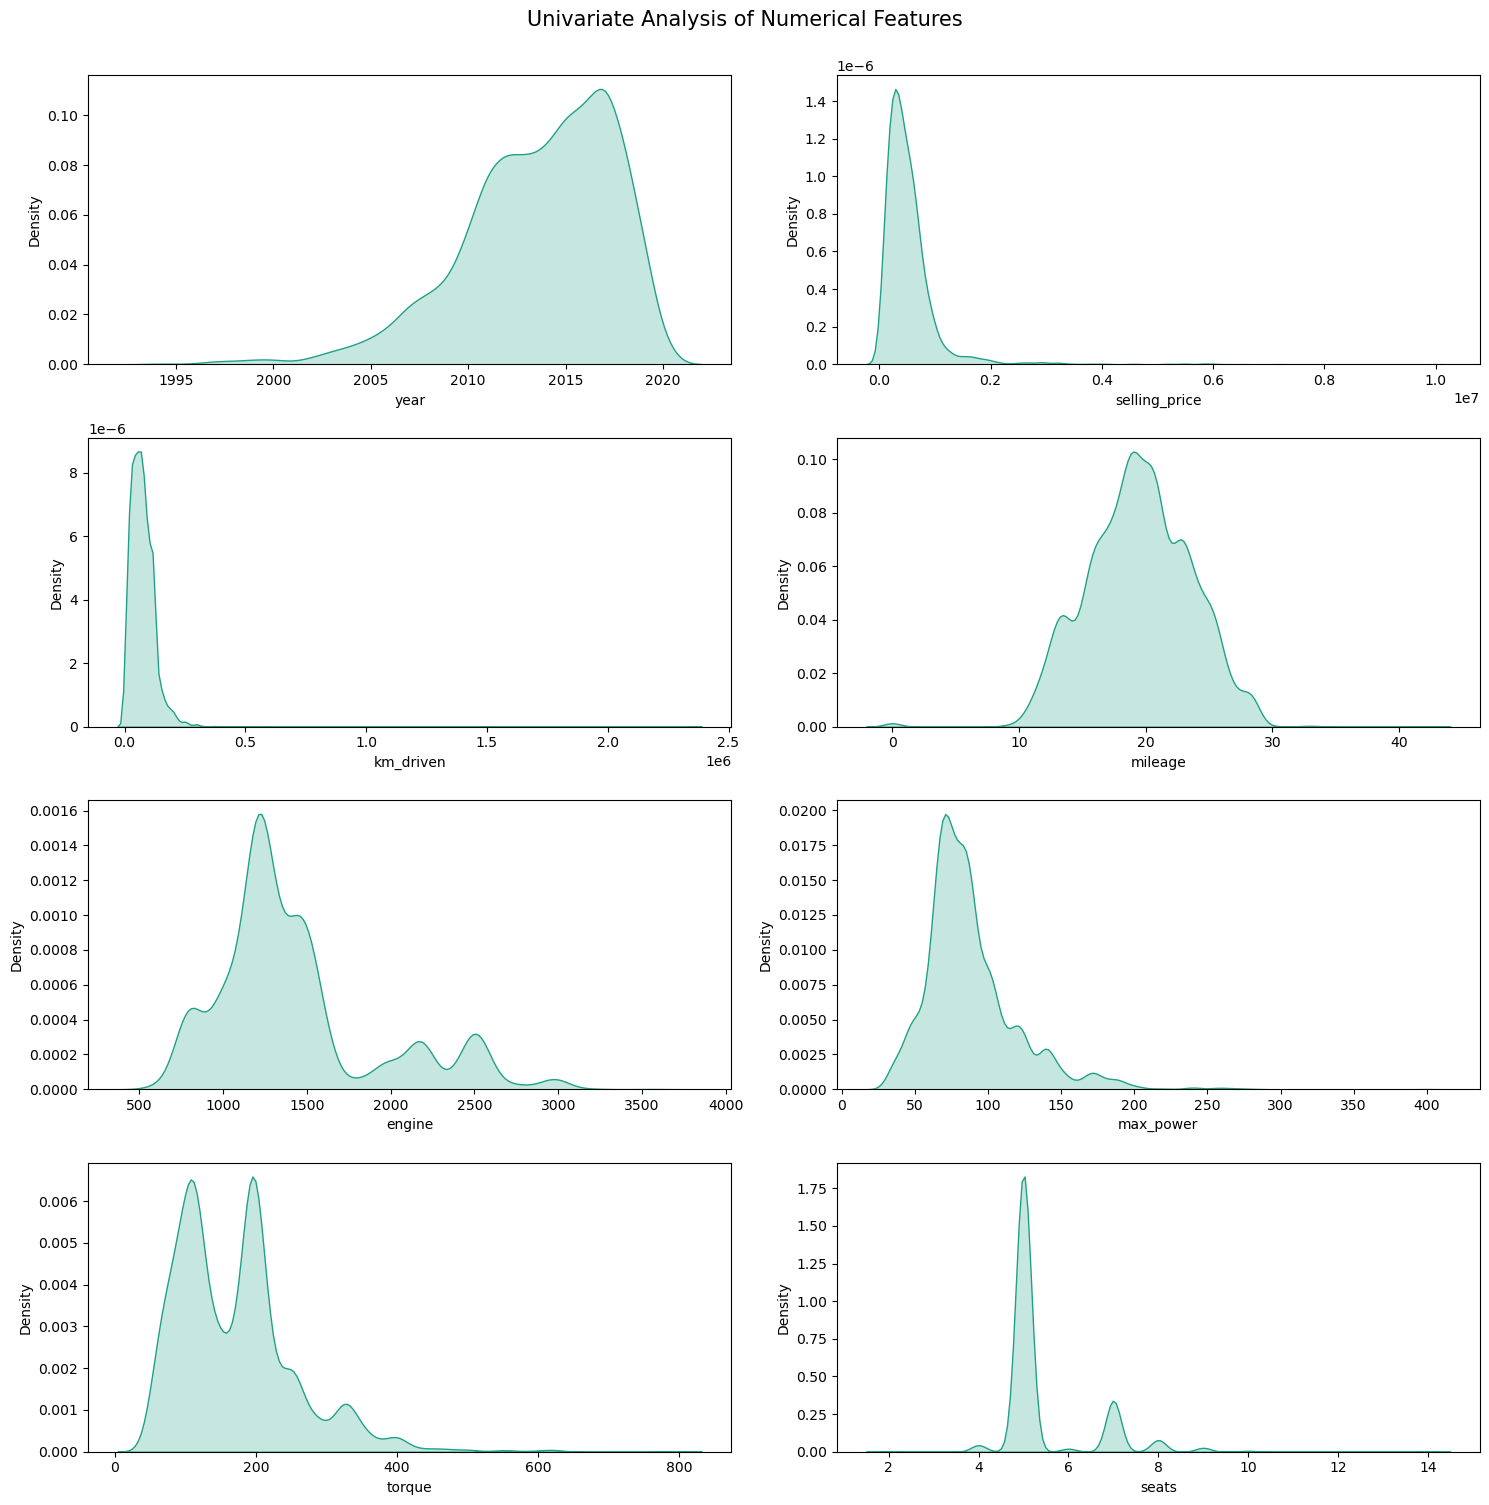

In [16]:
# Set the size of the entire figure
plt.figure(figsize=(15, 15))

# Add a title to the entire figure
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=15, y=1.)

# Loop through each numeric column for univariate analysis
for i in range(0, len(num_cols)):
    # Create subplots in a 4x2 grid
    plt.subplot(4, 2, i+1)
    
    # Plot the Kernel Density Estimate (KDE) for the current numeric column with 'viridis' color palette
    sns.kdeplot(x=data[num_cols[i]], shade=True, color=sns.color_palette('viridis')[3])
    
    # Set xlabel for the subplot
    plt.xlabel(num_cols[i])
    
    # Adjust layout for better spacing between subplots
    plt.tight_layout()

# Show the plot
plt.show()

The above univariate analysis, KDE plots, are used to estimate the probability density function of the data, giving insights into the data's distribution, central tendency, and spread.

Based on the above plots, we can observe skewness in some of the features. Hence, we will plot to check for skewness in our numerical features.

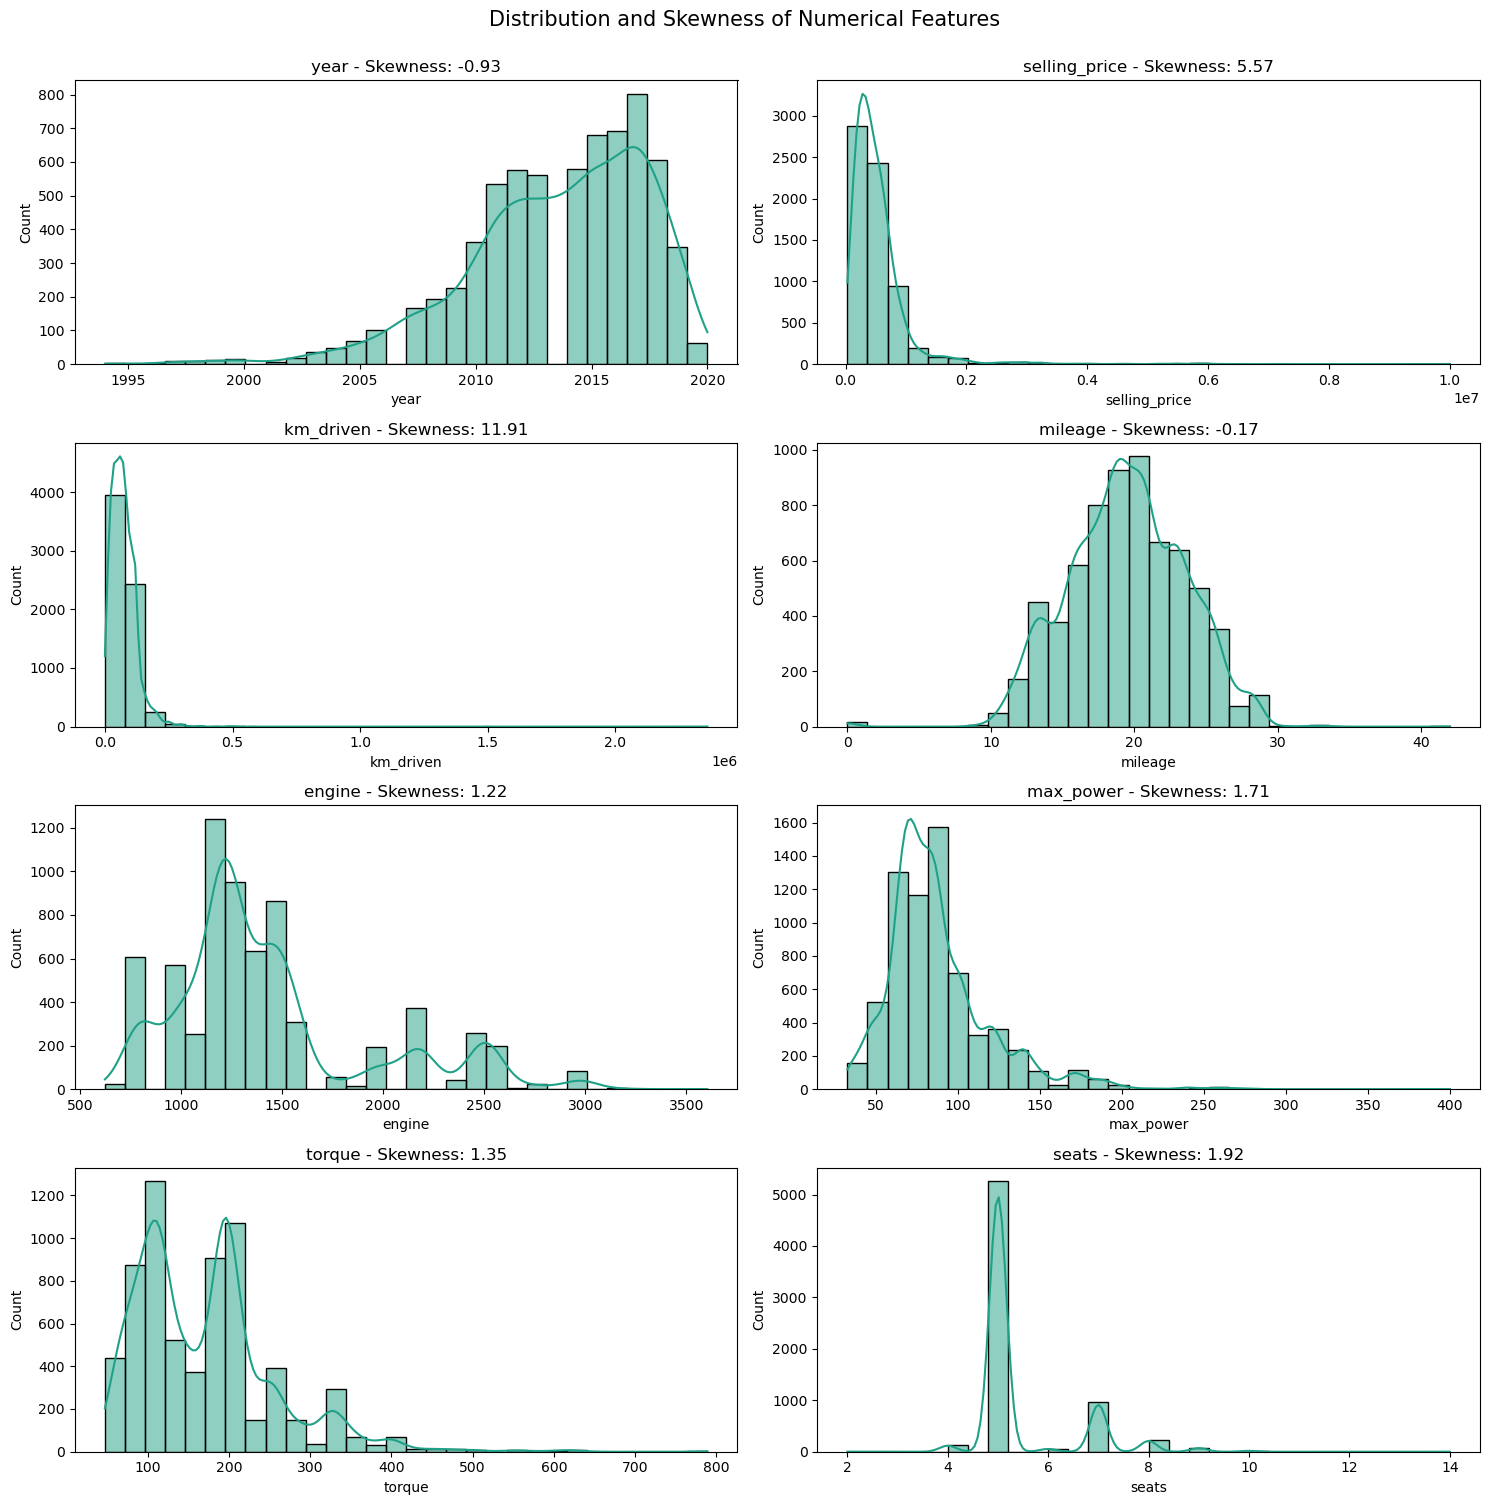

In [17]:
# Function to plot histograms with skewness lines
def plot_skewness(data, num_cols):
    # Set the size of the entire figure
    plt.figure(figsize=(15, 15))
    
    # Add a title to the entire figure
    plt.suptitle('Distribution and Skewness of Numerical Features', fontsize=15, y=1.)

    # Loop through each numeric column for plotting
    for i, col in enumerate(num_cols, 1):
        # Create subplots in a 4x2 grid
        plt.subplot(4, 2, i)
        
        # Plot a histogram with KDE for the current numeric column
        sns.histplot(data[col], kde=True, bins=30,color=sns.color_palette('viridis')[3])
        
        # Set the title for the subplot, including the skewness value
        plt.title(f'{col} - Skewness: {skew(data[col]):.2f}')

    # Adjust layout for better spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Plotting
plot_skewness(data, num_cols)

The above plots shows the titles of the subplots which includes the name of the feature and its skewness value.

### Descriptive Statistics

Adding onto the above set of visualizaitons, we will calculate summary statistics (mean, median, standard deviation, etc.) to describe the central tendency and dispersion of the data.

We will also apply formating to the statstics table to ensure that the numbers are displayed without necessary trailing zeros, making the output more concise.

In [18]:
# Use the describe method to generate descriptive statistics for numeric columns
data[num_cols].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,6717,6717,6717,6717,6717,6717,6717,6717
mean,2013.61,526386,73398.3,19.4666,1430.99,87.7661,171.2,5.43427
std,3.8974,523550,58703.3,4.0481,493.469,31.7246,84.8025,0.983805
min,1994,29999,1,0,624,32.8,47.088,2
25%,2011,250000,38000,16.8,1197,67.1,110.853,5
50%,2014,420000,68203,19.44,1248,81.83,160,5
75%,2017,650000,100000,22.5,1498,100,200.124,5
max,2020,1e+07,2.36046e+06,42,3604,400,789,14


### 4.1 Analysing Dependent variable: 'selling_price'

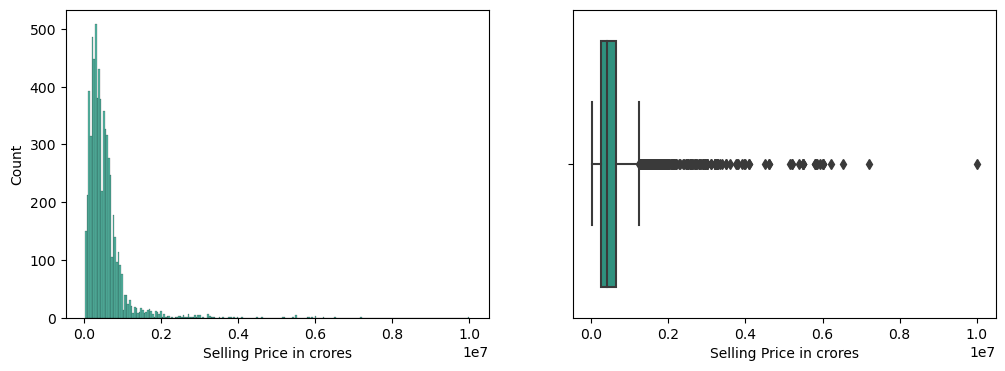

In [19]:
# Set the size of the entire figure
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of Selling Price
plt.subplot(1, 2, 1)

# Plot a histogram of the 'selling_price' variable
sns.histplot(data=data, x='selling_price', color=sns.color_palette('viridis')[3])

# Set xlabel for the subplot
plt.xlabel('Selling Price in crores')

# Subplot 2: Boxplot of Selling Price
plt.subplot(1, 2, 2)

# Plot a boxplot of the 'selling_price' variable
sns.boxplot(data=data, x='selling_price', color=sns.color_palette('viridis')[3])

# Set xlabel for the subplot
plt.xlabel('Selling Price in crores')

# Display the plots
plt.show()

The above is a side-by-side visualization consisting of a histogram and a boxplot for the 'selling_price' variable. 

The histogram shows the distribution of selling prices, while the boxplot provides information on the central tendency, spread, and the presence of outliers in the data.

In [20]:
# Calculate the 70th percentile of the 'selling_price' column
seventieth_percentile = data['selling_price'].quantile(0.70)

print('seventieth_percentile: ', seventieth_percentile)

seventieth_percentile:  600000.0


The seventieth percentile indicates that 70% of the selling prices are below  this value. This provides a specific threshold below in which a significant portion of the data falls.

In [21]:
# Print the mean of the 'selling_price' column rounded to 2 decimal places
print(f'Mean of selling price: {round(data["selling_price"].mean(), 2)}')

# Print the median of the 'selling_price' column rounded to 2 decimal places
print(f'Median of selling price: {round(data["selling_price"].median(), 2)}')

Mean of selling price: 526386.0
Median of selling price: 420000.0


The mean selling price is considerably higher than the median.

The dataset's maximum selling price is observed to be 7,200,000, emphasizing  right-skewed distribution with a majority of prices concentrated towards the lower end, but with some higher-priced outliers influencing the mean.

These outliers might represent premium or luxury vehicles that significantly impact the overall selling price range.

### Data Transformation 

Having performed Visual Inspection and Statistical Analysis on the 'selling_price' variable we can conclude that the distributions are not normal and hence we can consider data transformation to normalize the dataset.

We will perform different transformations on the 'selling_price' variable and visualise the density plots of the transformed data.

The intention is to explore how different transformations affect the distribution of the 'selling_price' variable and indentify a transformation that makes the data more appromimatey normally distributed.

The different transformations explored are:

1. Log Transformation
2. SQRT Transformation
3. Boxcox Transformation

In [22]:
# Extract selling prices that are greater than 0 (Box-Cox transformation requires positive values)
positive_selling_price = data[data['selling_price'] > 0]['selling_price']

# Perform Box-Cox transformation on the positive selling prices
boxcox_results = boxcox(positive_selling_price)

# Extract the transformed data and the lambda value used in the Box-Cox transformation
y_boxcox = boxcox_results[0]
y_lambda = boxcox_results[1]

Text(0.5, 1.0, 'Boxcox Tranformation')

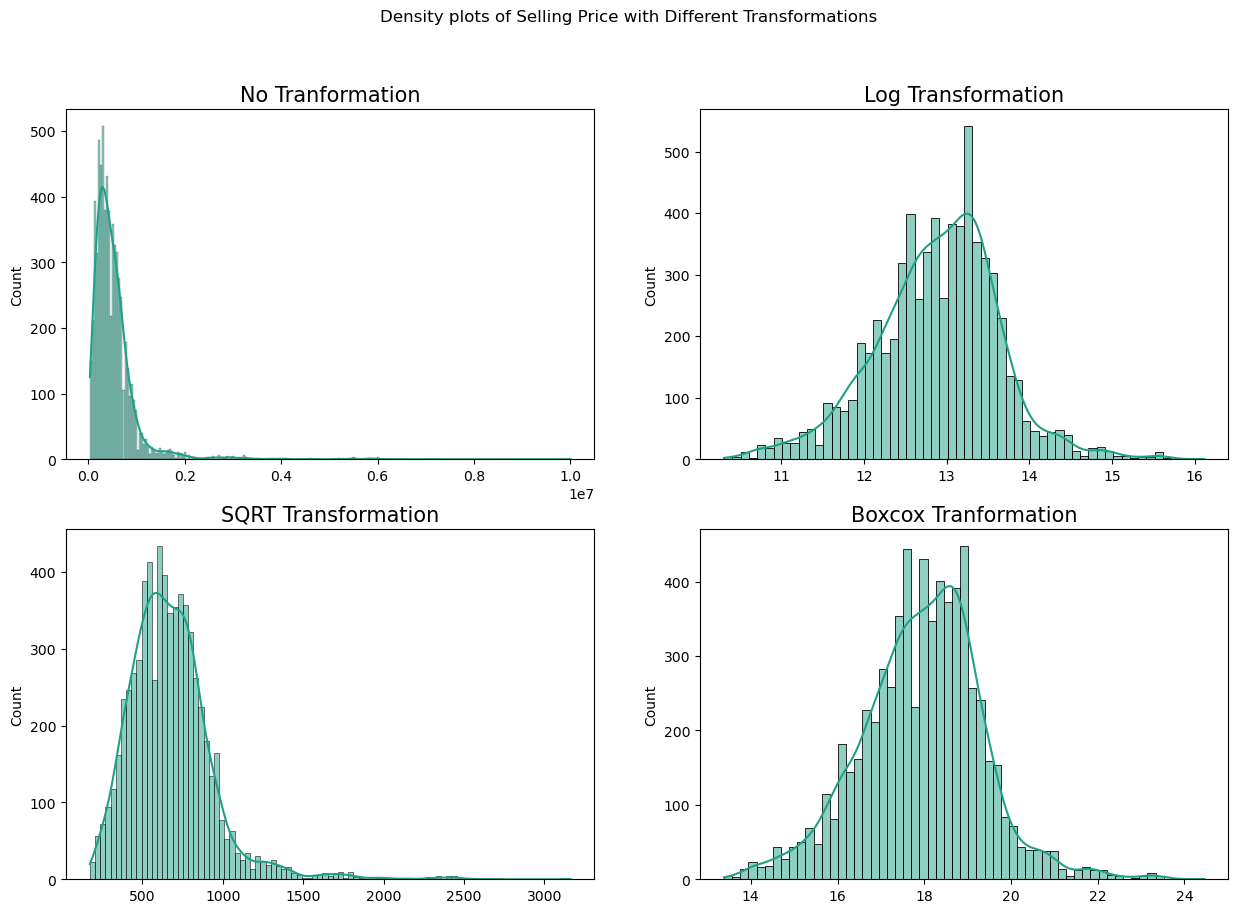

In [23]:
# Creating a 2x2 subplot grid for visualizing different transformations.
fig, axes = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('Density plots of Selling Price with Different Transformations')

# The first subplot (top-left) shows the density plot of the original 'selling_price' data without any transformation
sns.histplot(ax=axes[0,0], x=data['selling_price'], kde=True,color=sns.color_palette('viridis')[3]).set_xlabel(None)
axes[0,0].set_title('No Tranformation', fontsize=15)

# The second subplot (top-right) shows the density plot after applying a log transformation to the 'selling_price' data.
sns.histplot(ax=axes[0,1], x=np.log(data['selling_price']), kde=True, color=sns.color_palette('viridis')[3]).set_xlabel(None)
axes[0,1].set_title('Log Transformation', fontsize=15)

#The third subplot (bottom-left) shows the density plot after applying a square root (SQRT) transformation to the 'selling_price' data.
sns.histplot(ax=axes[1,0], x=np.sqrt(data['selling_price']), kde=True, color=sns.color_palette('viridis')[3]).set_xlabel(None)
axes[1,0].set_title('SQRT Transformation', fontsize=15)

# The fourth subplot (bottom-right) shows the density plot after applying the Box-Cox transformation to the 'selling_price' data.
sns.histplot(ax=axes[1,1], x=y_boxcox, kde=True, color=sns.color_palette('viridis')[3])
axes[1,1].set_title('Boxcox Tranformation', fontsize=15)

The above plots enable us to visually compare the density plots of the original 'selling_price' data and the data after applying different transformations.

Moreover, it can be concluded that Log Transformation performs better when compared to the the other transformations.

### Performing Log Transformation & Outlier Handling 

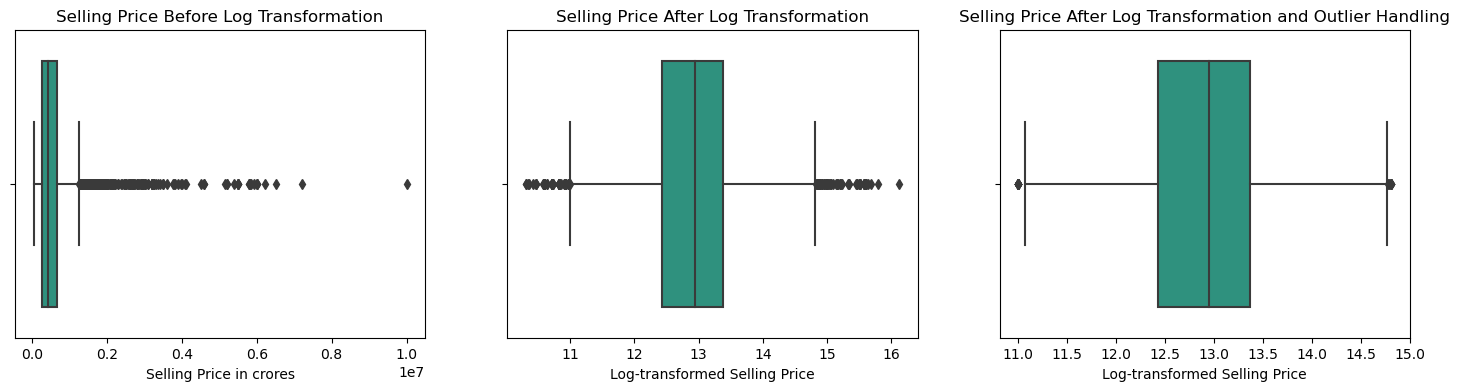

In [24]:
# Function to calculate lower and upper limits for outliers after log transformation
def log_lower_and_upper_limit(data, column):
    # Applying log transformation to the column
    log_values = np.log1p(data[column])
    
    # Calculating limits on log-transformed values
    q1 = log_values.quantile(0.25)
    q3 = log_values.quantile(0.75)
    iqr = q3 - q1
    
    return np.exp(q1 - 1.5 * iqr), np.exp(q3 + 1.5 * iqr)

# Function to remove outliers based on log-transformed limits
def log_removing_outliers(data, column):
    lower_limit, upper_limit = log_lower_and_upper_limit(data, column)
    
    # Applying log transformation to the column
    log_values = np.log1p(data[column])
    
    # Removing outliers based on log-transformed limits
    return data[(log_values >= np.log1p(lower_limit)) & (log_values <= np.log1p(upper_limit))]


# Choose a specific color from the 'viridis' palette
custom_color = sns.color_palette('viridis')[3]

# Box plots before and after log transformation and outlier handling
plt.figure(figsize=(18, 4))

# Subplot 1: Box plot before log transformation
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='selling_price', color=custom_color)
plt.title('Selling Price Before Log Transformation')
plt.xlabel('Selling Price in crores') 

# Log transformation and outlier handling
data['selling_price_log'] = np.log1p(data['selling_price'])

# Subplot 2: Box plot after log transformation
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='selling_price_log', color=custom_color)
plt.title('Selling Price After Log Transformation')
plt.xlabel('Log-transformed Selling Price') 

# Removing outliers and plotting the updated box plot
data = log_removing_outliers(data, 'selling_price')

# Subplot 3: Box plot after log transformation and outlier handling
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='selling_price_log', color=custom_color)
plt.title('Selling Price After Log Transformation and Outlier Handling')
plt.xlabel('Log-transformed Selling Price') 

plt.show()

The above code visualizes the impact of log transformation on the distribution of 'selling_price' and observes the effect of outlier handling using the calculated limits.

we have calculated the lower and upper limits for outliers after log transformation using the interquartile range (IQR) method and have removed the outliers based on the log-transformed limits.

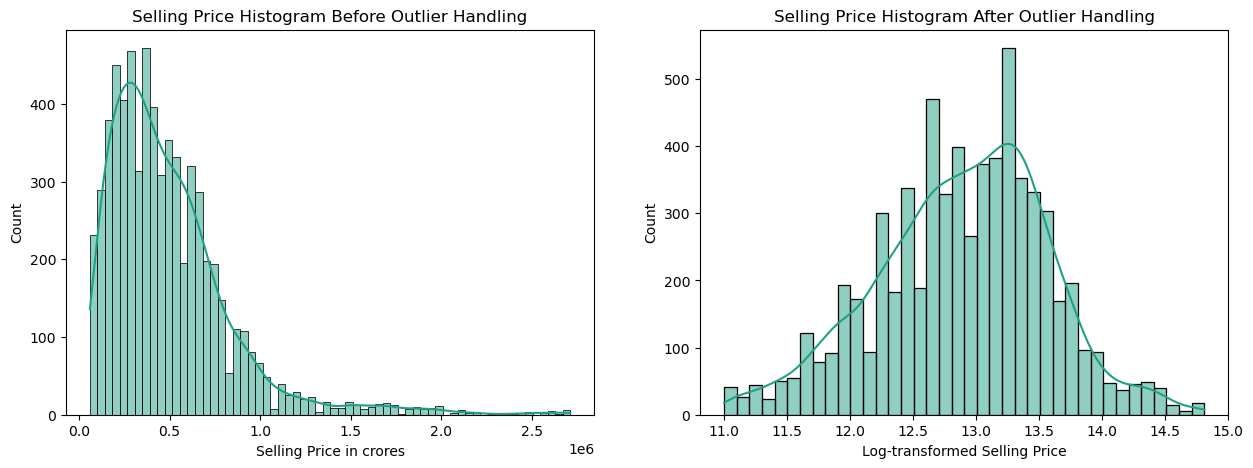

In [25]:
# Box plots before and after outlier handling
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram before outlier handling
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='selling_price', kde=True, color=custom_color)
plt.title('Selling Price Histogram Before Outlier Handling')
plt.xlabel('Selling Price in crores') 

# Subplot 2: Histogram after outlier handling
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='selling_price_log', kde=True, color=custom_color)
plt.title('Selling Price Histogram After Outlier Handling')
plt.xlabel('Log-transformed Selling Price') 

plt.show()

The left histogram shows the distribution of 'selling_price' before handling outliers, and the right histogram shows the distribution after applying a log transformation and handling outliers.

### 4.2 Analysing Independent Variable: 'km_driven'

In [26]:
# Descriptive statistics for the 'km_driven' column
data['km_driven'].describe()

count    6.566000e+03
mean     7.376546e+04
std      5.897443e+04
min      1.000000e+00
25%      3.900000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

The 'km_driven' column has a range from 1 to 2,360,457 kilometers.

The data appears to be positively skewed, as the mean is greater than the median.

There is a significant difference between the maximum value and the values at the 75th percentile, suggesting the presence of potential outliers or extreme values.

It's worth noting that the maximum value of 2,360,457 kilometers seems unusually high compared to the rest of the data. Hence, we may have to investigate further. 

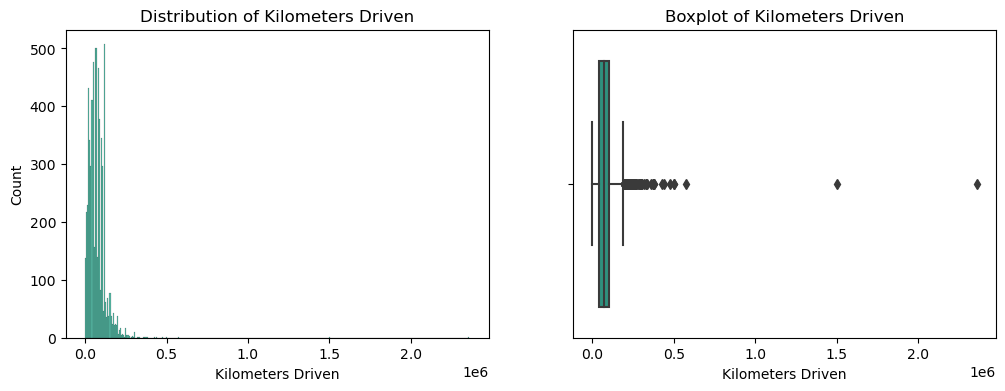

In [27]:
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'km_driven'
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='km_driven', color=custom_color)
plt.xlabel('Kilometers Driven')
plt.title('Distribution of Kilometers Driven')

# Subplot 2: Boxplot of 'km_driven'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='km_driven', color=custom_color)
plt.xlabel('Kilometers Driven')
plt.title('Boxplot of Kilometers Driven')

plt.show()

The histogram provides insights into the frequency distribution of kilometers driven, while the boxplot provides information about central tendency, spread, and the presence of potential outliers.

### Outliers Handling 

In [28]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1

    # Define lower and upper limits to filter outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Filter the data and keep only values within the specified range
    data_no_outliers = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

    return data_no_outliers

The above code provides a reusable way to remove outliers from a specified column in a DataFrame using the IQR method. 

In [29]:
# Apply the function to remove outliers from the 'km_driven' column in the 'data' DataFrame
data = remove_outliers_iqr(data, 'km_driven')

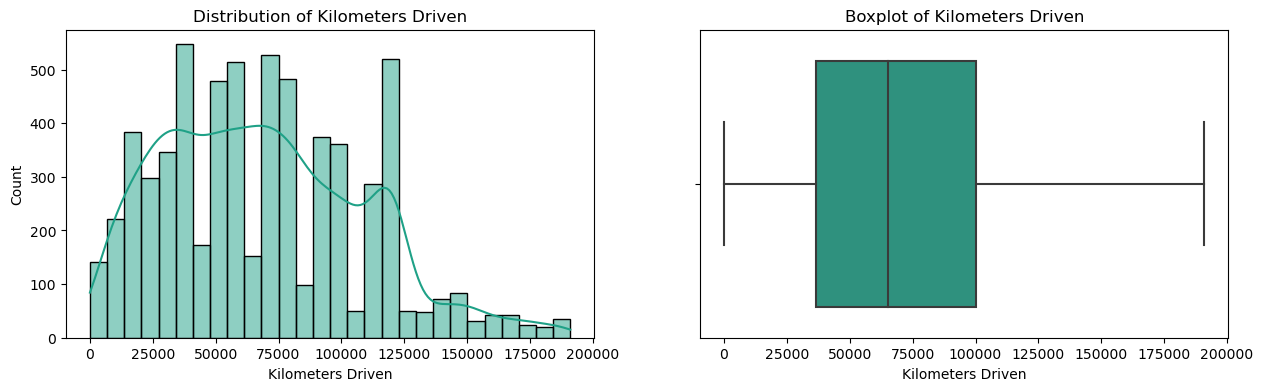

In [30]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 4))

# Subplot 1: Histogram of 'km_driven' with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='km_driven', kde=True, color=custom_color )
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')

# Subplot 2: Boxplot of 'km_driven'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='km_driven', color=custom_color)
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')

# Display the plots
plt.show()

The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'km_driven' variable.

### Analysing Relationship : 'selling_price' vs 'km_driven'

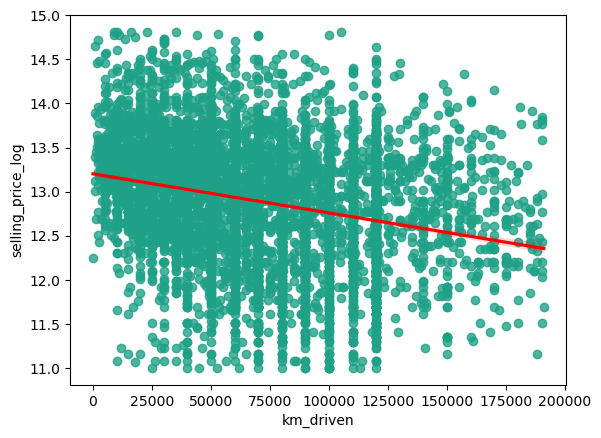

In [31]:
# Create a scatter plot with a regression line
sns.regplot(data=data, x='km_driven', y='selling_price_log', line_kws={"color": "red"}, color=custom_color )

# Display the plot
plt.show()

The code above visually explores the potential linear relationship between the 'km_driven' and 'selling_price_log' columns. 

The red regression line helps indicate the general trend of the relationship and it slopes downwards. 

This suggests a negative correlation between 'km_driven' and 'selling_price'.

In [32]:
# Calculate the Pearson correlation coefficient between 'km_driven' and 'selling_price_log'
data['km_driven'].corr(data['selling_price_log'])

-0.25850176414349013

The correlation coefficient between 'km_driven' and 'selling_price_log' is approximately -0.259.

This negative correlation suggests that there is a weak linear relationship between the log-transformed 'selling_price' ('selling_price_log') and 'km_driven'. 

As 'km_driven' increases, the log-transformed selling price tends to decrease, but the relationship is not very strong based on the magnitude of the correlation coefficient.

### 4.3 Analysing Independent Variable: 'mileage'

In [33]:
# Descriptive statistics for the 'mileage' column
data['mileage'].describe()

count    6405.000000
mean       19.627149
std         3.990083
min         0.000000
25%        17.000000
50%        19.700000
75%        22.540000
max        33.440000
Name: mileage, dtype: float64

The median mileage is 19.7, which is the middle value of the dataset when sorted. The closeness of the mean and median suggests a relatively symmetric distribution.

A higher standard deviation suggests greater variability in mileage within the dataset.

The presence of a minimum value of 0 might indicate missing or invalid data, or it could represent a specific category (e.g., electric cars with no fuel consumption).

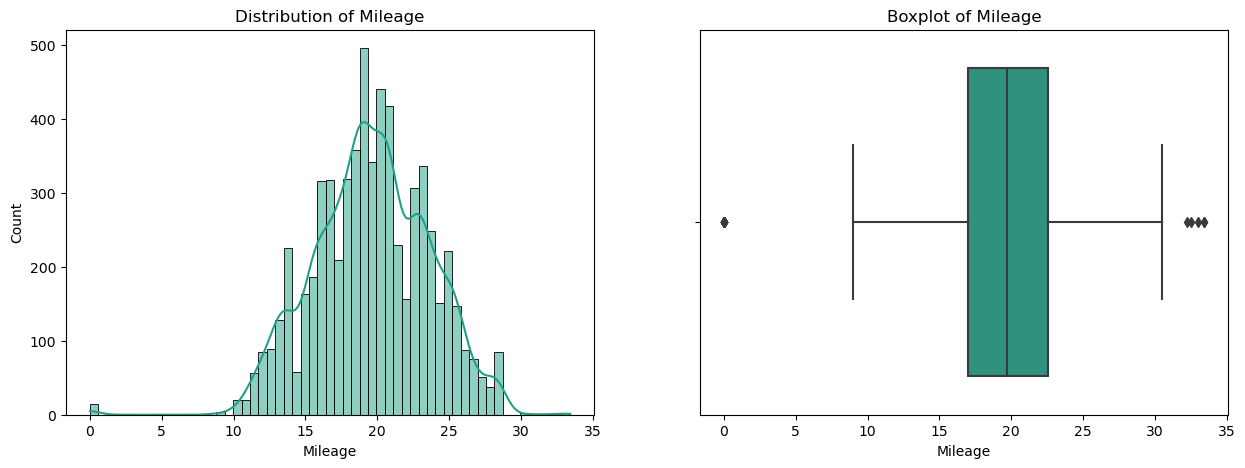

In [34]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram of 'mileage' with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='mileage', kde=True, color=custom_color)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')

# Subplot 2: Boxplot of 'mileage'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='mileage', color=custom_color)
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')

# Display the plots
plt.show()

The histogram provides insights into the frequency distribution of mileage values, while the boxplot provides information about central tendency, spread, and the presence of potential outliers.

In [35]:
# Sort the DataFrame based on the 'mileage' column in ascending order
data.sort_values(by=['mileage'], ascending=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
5733,Mahindra,2020,679000,5000,Diesel,Individual,Manual,First Owner,0.00,2523.0,70.00,200.0,2.0,13.428378
758,Hyundai,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.00,1086.0,62.00,96.1,5.0,11.695255
6636,Hyundai,2011,150000,40000,Petrol,Individual,Manual,Fourth & Above Owner,0.00,1086.0,62.00,96.1,5.0,11.918397
6446,Mahindra,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.00,2523.0,70.00,200.0,2.0,13.489782
2637,Hyundai,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.00,1086.0,62.10,96.1,5.0,12.122696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Maruti,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998.0,58.30,78.0,4.0,12.971543
2239,Maruti,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998.0,58.33,78.0,5.0,12.506181
5650,Maruti,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796.0,47.30,69.0,5.0,12.821261
3790,Maruti,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796.0,40.30,60.0,4.0,12.468441


It can be observed that there are extreme values in the 'mileage' variabe, particularly rows with a 'mileage' value of 0.

### Outliers Handling 

In [36]:
# Select rows where 'mileage' is equal to 0 and count the occurrences of each unique value
data['mileage'][data['mileage'] == 0].value_counts()

0.0    14
Name: mileage, dtype: int64

This output indicates that there are 14 occurrences of the value 0.0 in the 'mileage' column.

In [37]:
# Drop rows where 'mileage' is greater than or equal to 42
data = data.drop(data[data['mileage'] >= 42].index).reset_index(drop=True)

# Replace zero values in 'mileage' with the median of non-zero mileage values
data["mileage"] = np.where(data["mileage"] == 0, np.median(data['mileage']), data['mileage'])

The above code removes rows with unusually high mileage values, possibly indicating data errors or outliers.

Then it replaces zero mileage values with the median of non-zero mileage values, providing a more realistic representation of the data.

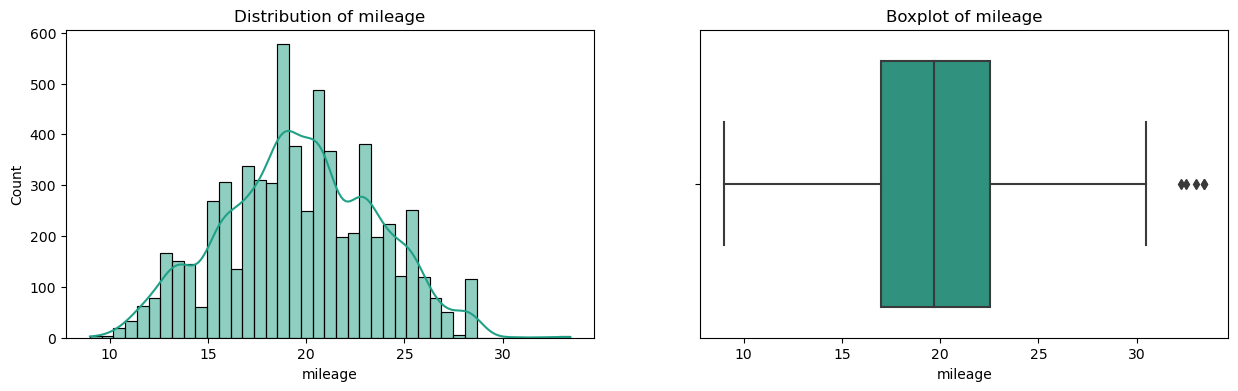

In [38]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 4))

# Subplot 1: Histogram of 'km_driven' with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='mileage', kde=True, color=custom_color )
plt.title('Distribution of mileage')
plt.xlabel('mileage')

# Subplot 2: Boxplot of 'km_driven'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='mileage', color=custom_color)
plt.title('Boxplot of mileage')
plt.xlabel('mileage')

# Display the plots
plt.show()

The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'mileage' variable.

### Analysing Relationship : 'selling_price' vs 'mileage'

<Axes: xlabel='mileage', ylabel='selling_price_log'>

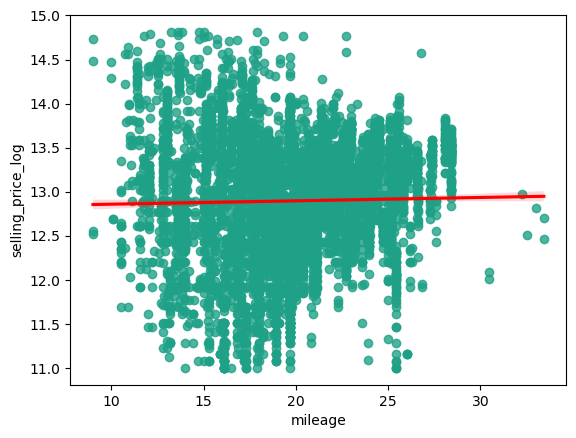

In [39]:
# Create a scatter plot with a regression line
sns.regplot(x='mileage', y=(data['selling_price_log']), data=data, line_kws={'color': 'red'}, color=custom_color)

The above code visually explores the potential linear relationship between 'mileage' and the log-transformed 'selling_price' using a scatter plot with a regression line.

The red regression line indicates that there is a very weak relationship between 'mileage' and 'selling_price'.

In [40]:
# Calculate the Pearson correlation coefficient between 'mileage' and 'selling_price_log'
data['mileage'].corr(data['selling_price_log'])

0.02175659254623797

The correlation coefficient between 'mileage' and 'selling_price_log' is approximately 0.0217. 

This value is close to zero, suggesting a very weak positive correlation between these two variables. 

In other words, there is little to no linear relationship between the mileage and the logarithmically transformed selling price.

### 4.4 Analysing Independent Variable : 'engine'

In [41]:
# Descriptive statistics for the 'engine' column
data['engine'].describe()

count    6405.000000
mean     1412.986885
std       471.192483
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3498.000000
Name: engine, dtype: float64

The mean engine capacity is approximately 1413, indicating that, on average, the engine capacity across the dataset is around 1413 cubic centimeters.

The median engine capacity is 1248, which is the middle value of the dataset when sorted. This is less than the mean, suggesting a right-skewed distribution, as the mean is pulled to the right by higher values.

This suggests that there might be a few vehicles with significantly larger engine capacities, pulling the mean to the right.

A higher standard deviation suggests greater variability in engine capacities within the dataset.

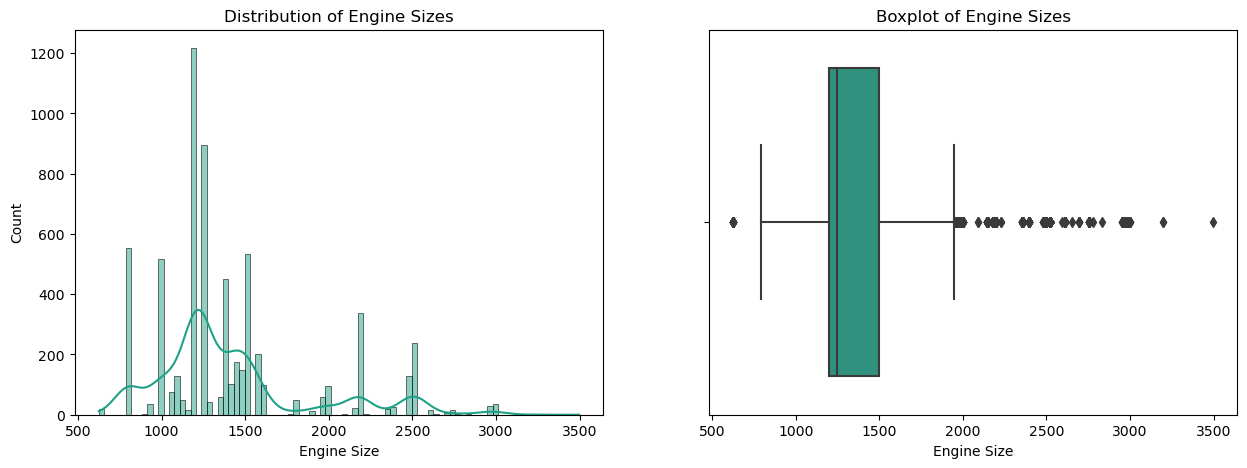

In [42]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram of 'engine' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='engine', kde=True, color=custom_color)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')

# Subplot 2: Boxplot of 'engine'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='engine', color=custom_color)
plt.title('Boxplot of Engine Sizes')
plt.xlabel('Engine Size')

# Display the plots
plt.show()

The histogram provides insights into the frequency distribution of engine sizes, while the boxplot summarizes key statistics, such as the median, quartiles, and potential outliers.

### Outliers Handling 

In [43]:
# Apply the function to remove outliers from the 'engine' column in the 'data' DataFrame
data = remove_outliers_iqr(data, 'engine')

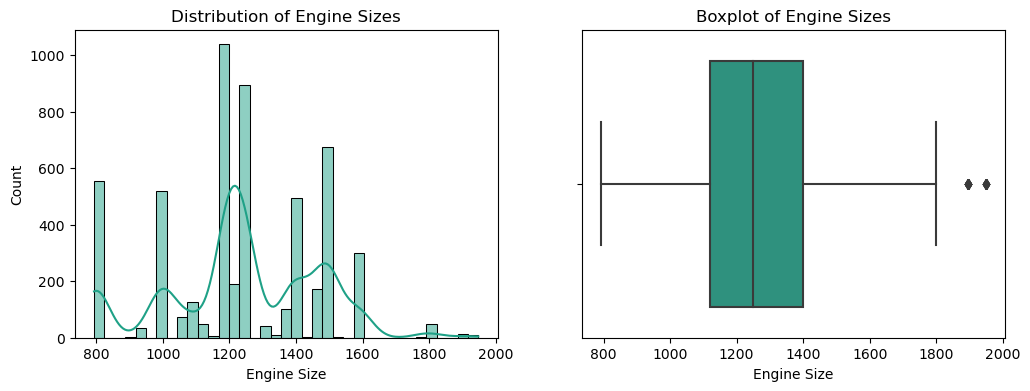

In [44]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'engine' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='engine', kde=True, color=custom_color)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')

# Subplot 2: Boxplot of 'engine'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='engine', color=custom_color)
plt.title('Boxplot of Engine Sizes')
plt.xlabel('Engine Size')

# Display the plots
plt.show()


The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'engine' variable.

### Analysing Relationship : 'selling_price' vs 'engine'

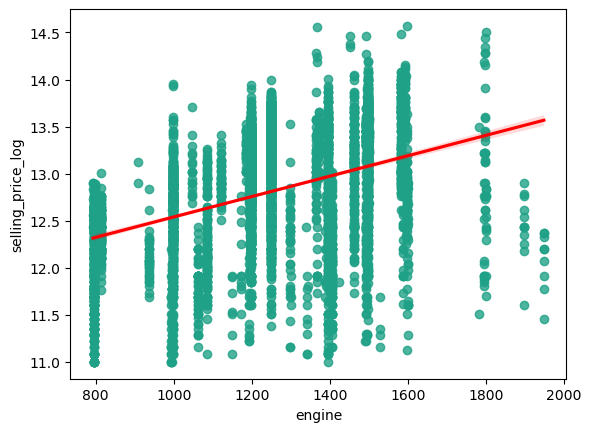

In [45]:
# Create a scatter plot with a regression line
sns.regplot(data=data, x='engine', y='selling_price_log', line_kws={'color': 'red'}, color=custom_color)
plt.show()

The above code visually explores the potential linear relationship between the 'engine' and 'selling_price_log' columns.

The red regression line slopes upwards and this suggests a positive correlation between 'engine' and 'selling_price'.

In [46]:
# Calculate the Pearson correlation coefficient between 'engine' and 'selling_price_log'
data['engine'].corr(data['selling_price_log'])

0.3925307930738157

In this case, the correlation coefficient is approximately 0.3925, suggesting a positive but moderate linear correlation between 'engine' and 'selling_price_log'.

### 4.5 Analysing Independent Variable : 'max_power'

In [47]:
# Descriptive statistics for the 'max_power' column
data['max_power'].describe()

count    5365.000000
mean       80.035572
std        19.805600
min        32.800000
25%        67.100000
50%        78.900000
75%        88.730000
max       189.300000
Name: max_power, dtype: float64

The median maximum power is 78.9, which is the middle value of the dataset when sorted. The closeness of the mean and median suggests a relatively symmetric distribution.

A higher standard deviation suggests greater variability in maximum power within the dataset.

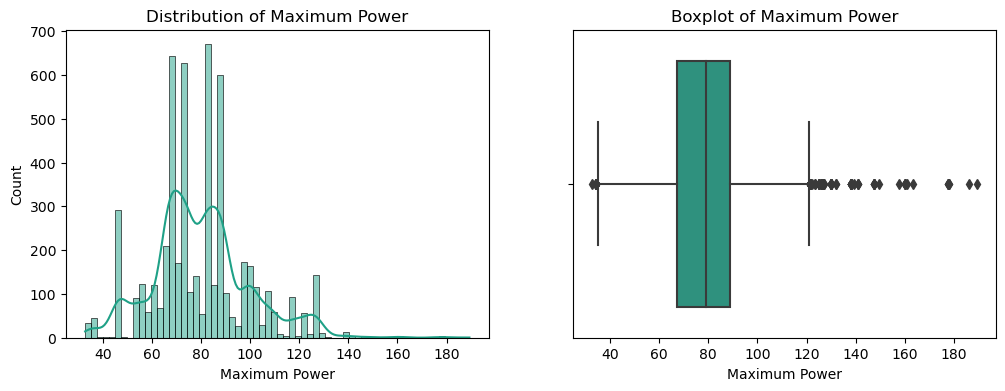

In [48]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'max_power' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='max_power', kde=True, color=custom_color)
plt.title('Distribution of Maximum Power')
plt.xlabel('Maximum Power')

# Subplot 2: Boxplot of 'max_power'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='max_power', color=custom_color)
plt.title('Boxplot of Maximum Power')
plt.xlabel('Maximum Power')

# Display the plots
plt.show()

The histogram provides insights into the frequency distribution of maximum power, while the boxplot summarizes key statistics, such as the median, quartiles, and potential outliers.

### Outliers Handling

In [49]:
# Calculate quartiles and interquartile range (IQR)
Q1 = data['max_power'].quantile(0.25)
Q3 = data['max_power'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits for potential outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Print the calculated limits
print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

Lower Limit: 34.65499999999998
Upper Limit: 121.17500000000001


The above code identifies potential outliers in the 'max_power' column by defining a range within which values are considered typical. Values outside this range are considered potential outliers.

In [50]:
# Count the number of data points above the upper limit
data[data['max_power'] > upper_limit]['max_power'].count()

246

In [51]:
# Apply the function to remove outliers from the 'max_power' column in the 'data' DataFrame
data = remove_outliers_iqr(data, 'max_power')

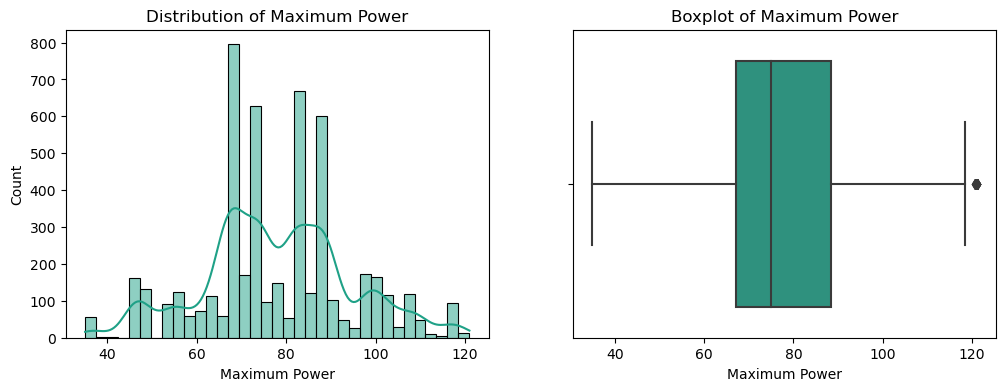

In [52]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'max_power' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='max_power', kde=True, color=custom_color)
plt.title('Distribution of Maximum Power')
plt.xlabel('Maximum Power')

# Subplot 2: Boxplot of 'max_power'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='max_power', color=custom_color)
plt.title('Boxplot of Maximum Power')
plt.xlabel('Maximum Power')

# Display the plots
plt.show()

The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'max_power' variable.

### Analysing Relationship : 'selling_price' vs 'max_power'

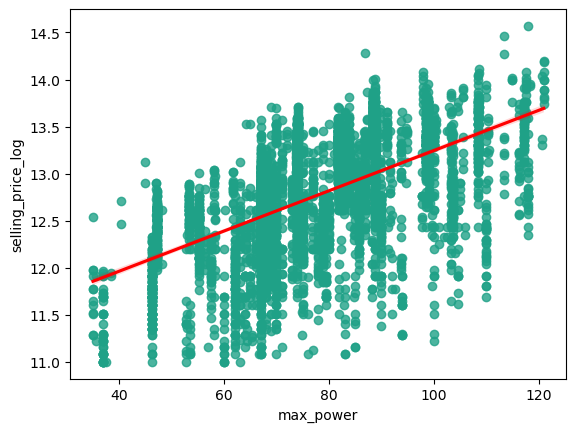

In [53]:
# Scatter plot with regression line
sns.regplot(data=data, x='max_power', y='selling_price_log', line_kws={'color': 'red'}, color=custom_color)
plt.show()

The above code visually explores the potential linear relationship between the 'max_power' and 'selling_price_log' columns.

The red regression line slopes upwards and this suggests a positive correlation between 'max_power' and 'selling_price'.

In [54]:
# Calculate the Pearson correlation coefficient between 'max_power' and 'selling_price_log'
data['max_power'].corr(data['selling_price_log'])

0.5731980977582772

The correlation coefficient of 0.5688 suggests a moderate positive linear correlation between 'max_power' and 'selling_price_log'.

The positive value indicates that as 'max_power' increases, 'selling_price_log' tends to increase as well. 

The strength of the correlation is moderate, as the coefficient is not close to 1 but is still significantly positive.

### 4.6 Analysing Independent Variable : 'torque'

In [55]:
# Descriptive statistics for the 'torque' column
data['torque'].describe()

count    5098.000000
mean      143.854847
std        55.831184
min        55.917000
25%       100.000000
50%       130.000000
75%       190.000000
max       789.000000
Name: torque, dtype: float64

The difference between the mean and median suggests a right-skewed distribution, where a few high torque values are pulling the mean to the right.

A higher standard deviation suggests greater variability in torque within the dataset.

The presence of a maximum value much larger than the 75th percentile suggests potential outliers or a right-skewed distribution.

### 4.7 Analysing Independent Variable : 'seats'

In [56]:
# Descriptive statistics for the 'seats' column
data['seats'].describe()

count    5098.000000
mean        5.143782
std         0.574388
min         4.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

The median number of seats is 5, which is the middle value of the dataset when sorted. The mean and median are close, suggesting a relatively symmetric distribution.

A lower standard deviation suggests less variability in the number of seats within the dataset.

he presence of a maximum value much larger than the 75th percentile suggests potential outliers or extreme values that may need further investigation, particularly if such high values are unexpected in the context of the data 

### Correlation Analysis Between Numerical Features 

<Axes: >

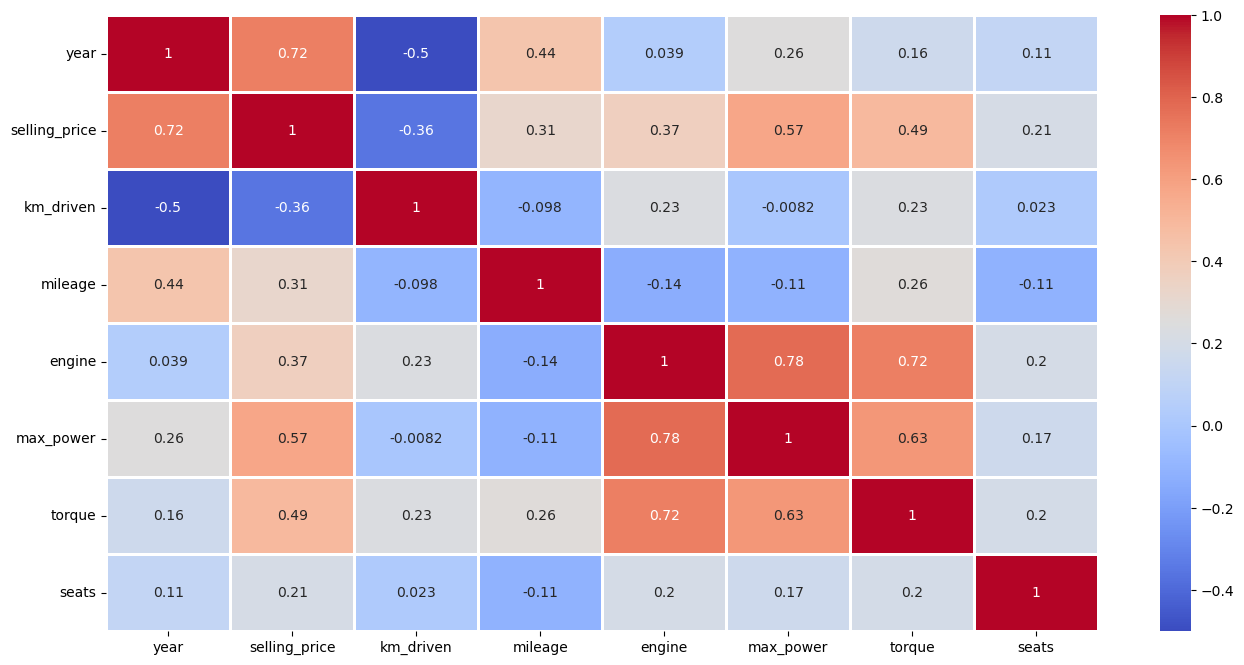

In [57]:
plt.figure(figsize=(16, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(data[num_cols].corr(), annot=True, linewidths=2, cmap='coolwarm')


It can be observed from the above heatmap that there is a high correalation between the 'torque' and 'max_power'. Hence, we will drop the 'torque' variable from the dataset.

Additionally, we will also drop the 'seats' variable due to its weak correalation with other numerical variables.

In [58]:
data = data.drop(['mileage','torque', 'seats'], axis=1)

### Categorical Data Analysis

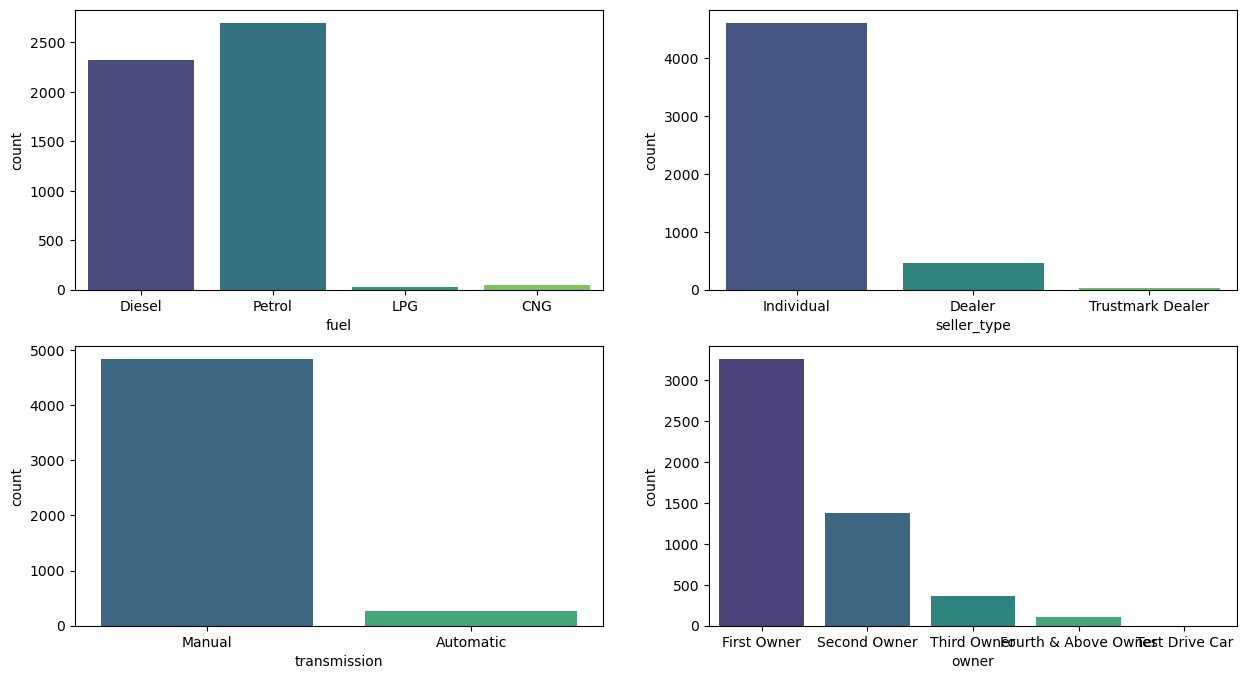

In [59]:
# Remove 'name' from the list of categorical columns
obj_cols.remove('name')

# Create a figure with a specified size
fig = plt.figure(figsize=[15, 8])

# Loop through each categorical column and create a countplot
for col in range(len(obj_cols)):
    plt.subplot(2, 2, col + 1)
    
    # Use Seaborn's countplot to visualize the count distribution
    sns.countplot(x=obj_cols[col], data=data, palette='viridis')
    
# Show the plots
plt.show()

The above code provides a visual representation of the count distribution for each categorical column in the dataset.

Each subplot represents a different categorical column, and the countplot shows the number of occurrences of each category.

###  4.8 Analysing Independent Variable : 'seller_type'

In [60]:
# Descriptive statistics for the 'seller_type' column
data['seller_type'].describe()

count           5098
unique             3
top       Individual
freq            4609
Name: seller_type, dtype: object

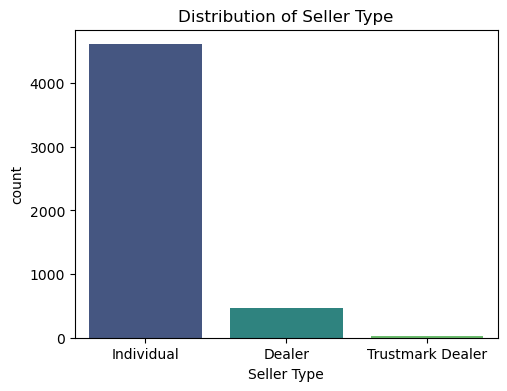

In [61]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Countplot of 'seller_type'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='seller_type', palette='viridis')
plt.title('Distribution of Seller Type')
plt.xlabel('Seller Type')

# Display the plots
plt.show()

There are 3 unique values in the 'seller_type' column. 

The most frequently occurring value in the 'seller_type' column is 'Individual'. 

This indicates that the majority of sellers in the dataset are individuals.

### Analysing Relationship : 'selling_price' vs 'seller_type'

In [62]:
# Group by 'seller_type' and calculate the mean of 'selling_price_log' for each group
seller_type_vs_selling_price = data.groupby('seller_type')['selling_price_log'].mean().reset_index()

In [63]:
# Rename the columns of the DataFrame
seller_type_vs_selling_price.columns = ['seller_type', 'avg_selling_price']

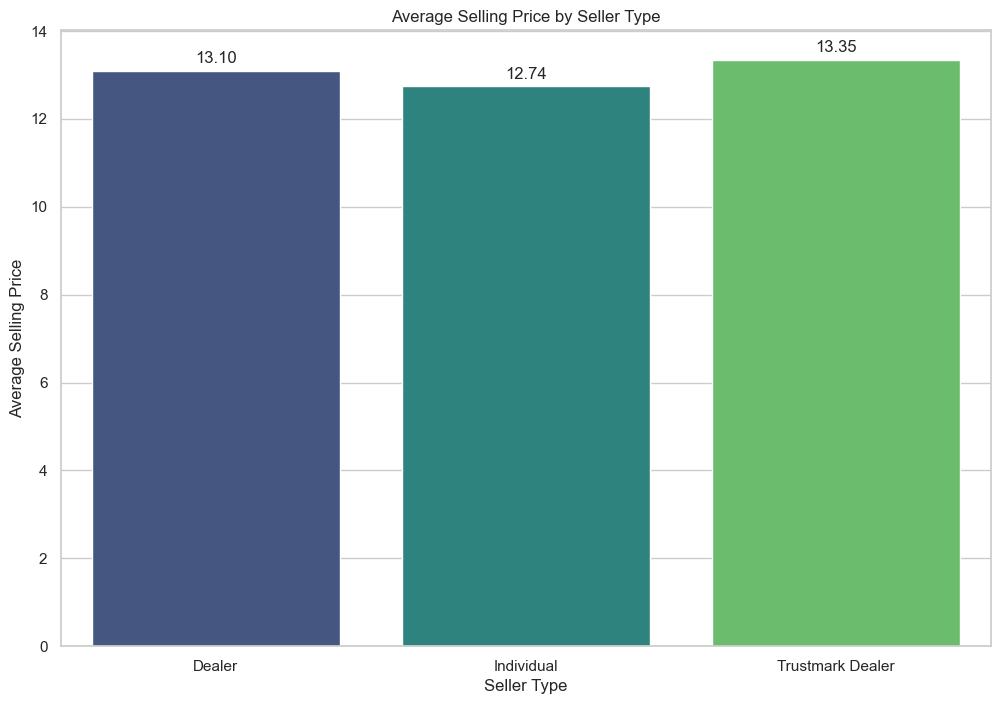

In [64]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='seller_type', y='avg_selling_price', data=seller_type_vs_selling_price, palette='viridis')

# Annotate each bar with its respective value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Set title and axis labels
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')

# Show the plot
plt.show()

Using the above code we can visually compare the average selling prices for different seller types using a bar plot.

it appears that 'Trustmark Dealer' has the highest average selling price, followed by 'Dealer' and then 'Individual'.

### 4.9 Analysing Independent Variable : 'fuel'

In [65]:
# Descriptive statistics for the 'fuel' column
data['fuel'].describe()

count       5098
unique         4
top       Petrol
freq        2694
Name: fuel, dtype: object

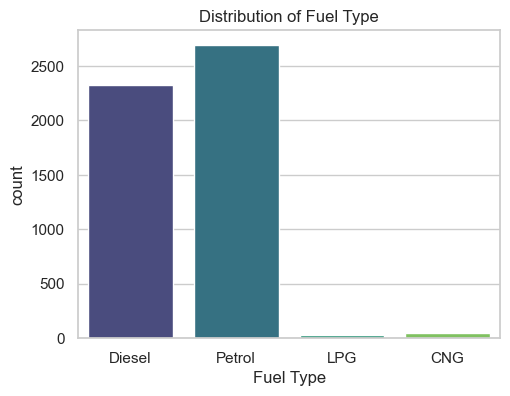

In [66]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Countplot of 'fuel'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='fuel', palette='viridis')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')

# Display the plots
plt.show()

There are 4 unique values in the 'fuel' column. This suggests that there are four distinct categories or types of fuel used by the vehicles in the dataset.

The most frequently occurring value in the 'fuel' column is "Petrol." This indicates that the majority of vehicles in the dataset use petrol as their fuel type.

### Analysing Relationship : 'selling_price' vs 'fuel'

In [67]:
# Group by 'fuel' and calculate the mean of 'selling_price_log' for each group
fuel_type_vs_selling_price = data.groupby('fuel')['selling_price_log'].mean().reset_index()

# Rename the columns of the DataFrame
fuel_type_vs_selling_price.columns = ['fuel', 'avg_selling_price']

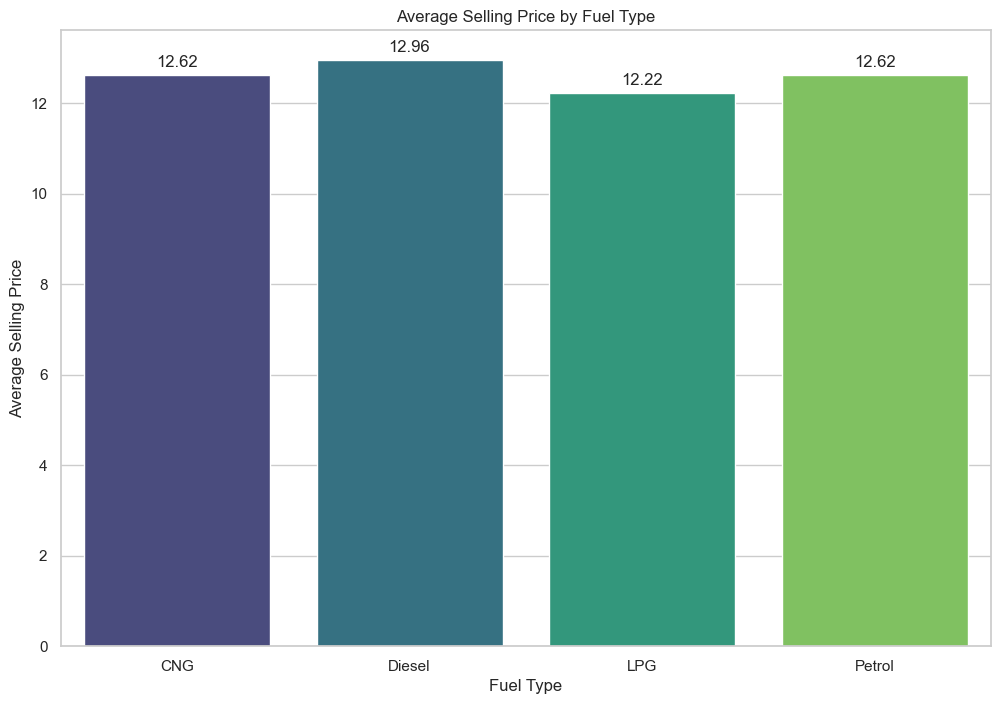

In [68]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='fuel', y='avg_selling_price', data=fuel_type_vs_selling_price, palette='viridis')

# Annotate each bar with its respective value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Set title and axis labels
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')

# Show the plot
plt.show()


Each row in the table represents a different fuel type, and the corresponding column 'avg_selling_price' provides the average selling price for vehicles using that type of fuel.

It appears that vehicles using diesel have the highest average selling price, followed by CNG, petrol, and then LPG.

### 4.10 Analysing Independent Variable : 'transmission'

In [69]:
# Descriptive statistics for the 'transmission' column
data['transmission'].describe()

count       5098
unique         2
top       Manual
freq        4838
Name: transmission, dtype: object

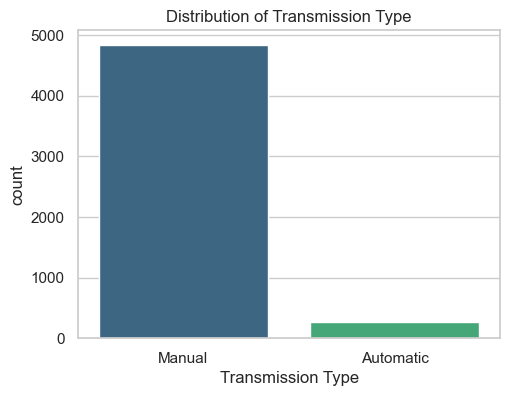

In [70]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Countplot of 'transmission'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='transmission', palette='viridis')
plt.title('Distribution of Transmission Type')
plt.xlabel('Transmission Type')

# Display the plots
plt.show()

There are 2 unique values in the 'transmission' column. This suggests that there are two distinct categories or types of transmissions in the dataset.

The most frequently occurring value in the 'transmission' column is "Manual." This indicates that the majority of vehicles in the dataset have a manual transmission.

### Analysing Relationship : 'selling_price' vs 'transmission'

In [71]:
# Group by 'transmission' and calculate the mean of 'selling_price_log' for each group
transmission_type_vs_selling_price = data.groupby('transmission')['selling_price_log'].mean().reset_index()

# Rename the columns of the DataFrame
transmission_type_vs_selling_price.columns = ['transmission', 'avg_selling_price']

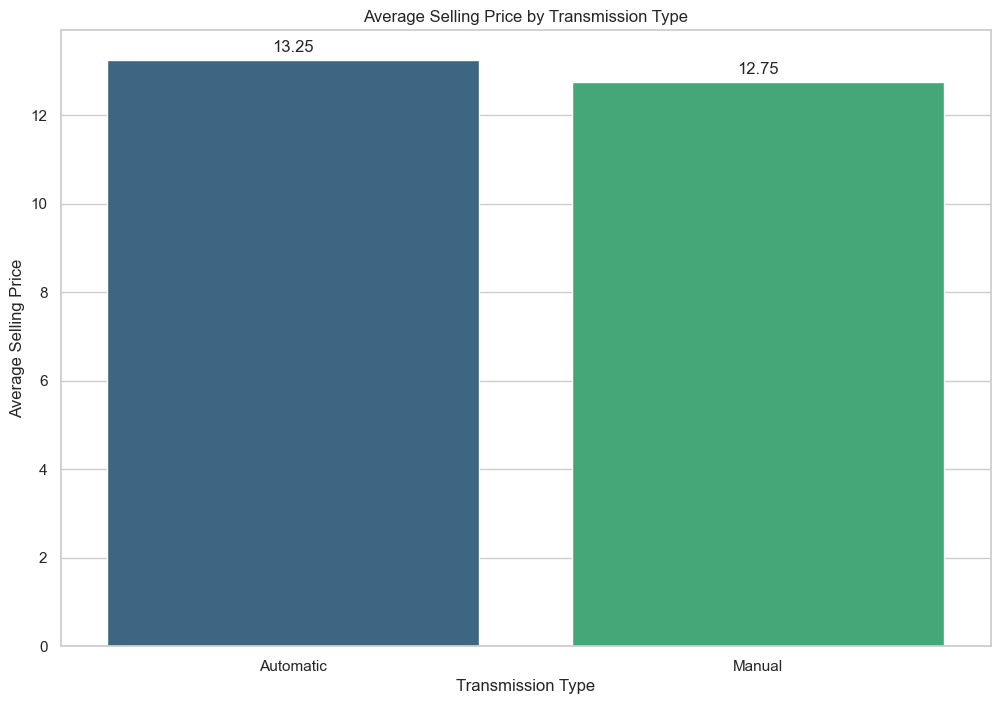

In [72]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='transmission', y='avg_selling_price', data=transmission_type_vs_selling_price, palette='viridis')

# Annotate each bar with its respective value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Set title and axis labels
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')

# Show the plot
plt.show()


It can be observed that 'utomatic'Vehicles have the highest average selling price, compared to 'Manual' transmission types.

In [73]:
data = data.drop(['owner','name', 'selling_price'], axis=1)

### Encoding Categorical Variables 

In [74]:
data.select_dtypes(include = 'object').columns.to_list()

['fuel', 'seller_type', 'transmission']

In [75]:
le = LabelEncoder()

In [76]:
data['seller_type'] = le.fit_transform(data['seller_type'])
data['fuel'] = le.fit_transform(data['fuel'])
data['transmission'] = le.fit_transform(data['transmission'])

In [77]:
data.head()

,year,km_driven,fuel,seller_type,transmission,engine,max_power,selling_price_log
0,2014,145500,1,1,1,1248.0,74.00,13.017005
1,2014,120000,1,1,1,1498.0,103.52,12.821261
2,2006,140000,3,1,1,1497.0,78.00,11.970357
3,2010,127000,1,1,1,1396.0,90.00,12.323860
4,2007,120000,3,1,1,1298.0,88.20,11.775297


The categorical variables in the dataset, including 'name,' 'seller_type,' 'fuel,' 'transmission,' and 'owner,' were encoded using the LabelEncoder from scikit-learn.

### 4.11 Conclusions Based on EDA Report

The Exploratory Data Analysis (EDA) conducted on the used car dataset has revealed crucial insights into various features, providing a comprehensive understanding of the dataset's characteristics. The analysis involved examining both numerical and categorical variables, leveraging visualizations to facilitate a deeper understanding.

The most crucial visualizations were the histogram and boxplot for numerical variables. These visualizations provided a detailed understanding of the distribution, presence of outliers, and the impact of outlier removal. They were instrumental in identifying patterns that would be challenging or impossible to discern without visual representation.

The removal of outliers, handling of zero values, and insights into the relationships between variables contribute to a more robust and accurate analysis. The visualizations, particularly histograms and boxplots, played a pivotal role in unraveling the nuances within the data.

### 5. Building Machine Learning Model

### 5.1  Identifying and Justifying Features

In the process of preparing the dataset for machine learning modeling, certain features were dropped based on considerations from the Exploratory Data Analysis (EDA) and domain-specific knowledge. The retained features were chosen to enhance the model's predictive power and relevance to the specific task at hand.

#### Dropped Feature: 'Selling Price' (Original)

The original Selling Price feature was dropped as it exhibited a right-skewed distribution, which could affect the performance of the machine learning model.

Logarithmically transforming the selling price (Selling Price Log) and removal of outliers helped address the skewness, making the target variable more suitable for linear modeling.

Log-transforming the selling price aligns with the assumption that the relationship between features and price is more linear in the logarithmic space. This transformation often helps in achieving a more normal distribution of the target variable, which is beneficial for linear regression models.

#### Dropped Feature: 'mileage'

It was observed from the EDA that there is little or no linear relationship between the mileage and the log transformed selling price. Hence, it has been dropped. 

#### Dropped Feature: 'Torque'

The EDA revealed a high correlation between Torque and Max Power.Dropping one of these highly correlated variables is a common practice to avoid multicollinearity issues in machine learning models.

#### Dropped Feature: 'Seats'

The analysis suggested that the distribution of the number of seats is relatively uniform with minimal variability.

#### Dropped Features: 'owner' and 'name'

These features were dropped primarily for simplifying the model. 

The Name column, representing the car's name, may introduce high cardinality, making it challenging for certain models.

The Owner column, based on domain knowledge, might not have a strong influence on the selling price.

While the car's name could potentially impact its value, the high cardinality might pose challenges for some machine learning algorithms. The 'Owner' variable, based on the nature of the task, may not be a crucial factor in predicting selling prices.

Below are the selected features, chosen to enhance the model's predictive power and relevance to the specific task.

#### Retained Feature: 'km_driven'

Kilometers driven is a critical factor influencing the selling price of a vehicle. The positive correlation between 'km_driven' and 'selling_price_log' indicates that as the kilometers driven increases, the selling price tends to decrease.

#### Retained Feature: 'fuel'

The distribution of fuel types was analyzed, and the average selling prices for different fuel types were compared. Diesel vehicles had the highest average selling price. The type of fuel a vehicle uses can significantly impact its selling price.

#### Retained Feature: 'seller_type', and 'transmission'

The seller type can influence the perceived value and trustworthiness of a transaction, thus affecting the selling price.

The type of transmission is an important factor influencing the selling price. 


#### Retained Feature: 'engine'

Engine size is a critical factor influencing a vehicle's performance and, consequently, its selling price. The positive correlation indicates that larger engines tend to be associated with higher selling prices.

#### Retained Feature: 'max_power'

Maximum power is a crucial aspect of a vehicle's performance and can influence its perceived value. The positive correlation suggests that higher maximum power is associated with higher selling prices.

In summary, the selected features were chosen based on their relevance to the task of predicting the logarithmically transformed selling price ('selling_price_log'). 

Each feature was carefully analyzed during EDA to understand its distribution, relationships with the target variable, and potential impact on the model's predictive performance. The features collectively provide a comprehensive representation of different aspects influencing the selling price of used cars.

In [78]:
data.head()

,year,km_driven,fuel,seller_type,transmission,engine,max_power,selling_price_log
0,2014,145500,1,1,1,1248.0,74.00,13.017005
1,2014,120000,1,1,1,1498.0,103.52,12.821261
2,2006,140000,3,1,1,1497.0,78.00,11.970357
3,2010,127000,1,1,1,1396.0,90.00,12.323860
4,2007,120000,3,1,1,1298.0,88.20,11.775297


### 5.2 Data Splitting and Scaling 

The dataset was split into 80% training and 20% testing sets, with 'selling_price_log' as the target variable.

In [79]:
# Identify features (x) and labels (y)
x = data.drop(labels = 'selling_price_log', axis =1)
y = data['selling_price_log']

# Split the data into 80% training and 20% testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# Print the shapes of training and testing sets
print(x_train.shape)
print(x_test.shape)

(4078, 7)
(1020, 7)


The dataset is split into training and testing sets to develop and evaluate the Linear Regression model. The features (x) and labels (y) are identified, with 'selling_price_log' as the target variable. 

### 5.3 Model Training and Model Evaluation

The Linear Regression model is created and trained on the training set. We will examine Coefficients, intercept, and R-squared values for model interpretation.

### Create and Train Linear Regression Model

In [80]:
# Create and train the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# List the coefficients with corresponding feature names
coefficients = model.coef_
feature_names = x_train.columns

print("Coefficients:")
for i, (feature, coef) in enumerate(zip(feature_names, coefficients)):
    print(f'  {i+1} ({feature}): {coef}')

# Print the intercept
print('\nIntercept: {:.4f}'.format(model.intercept_))

# Evaluate the model on the training set
train_r2 = model.score(x_train, y_train)
print('\nR-squared (Training): {:.4f}'.format(train_r2))

# Evaluate the model on the testing set
test_r2 = model.score(x_test, y_test)
print('R-squared (Testing): {:.4f}'.format(test_r2))

Coefficients:
  1 (year): 0.10775395563781903
  2 (km_driven): -1.2081756273673933e-06
  3 (fuel): -0.11687452256227523
  4 (seller_type): -0.06359073321014279
  5 (transmission): -0.07629075875008352
  6 (engine): -0.00013667070322307816
  7 (max_power): 0.014521915707194239

Intercept: -204.7442

R-squared (Training): 0.8100
R-squared (Testing): 0.8186


Coefficients: Each coefficient represents the change in the target variable for a one-unit change in the respective feature, assuming other features remain constant.

Positive coefficients (e.g., 'year' and 'max_power') indicate a positive relationship with the target.

Negative coefficients (e.g., 'km_driven', 'fuel', 'seller_type', 'transmission', and 'engine') indicate a negative relationship.

Intercept: The intercept represents the predicted value of the target when all features are zero.

R-squared (Training): 81% of the variance in the target variable is explained by the model on the training set.

R-squared (Testing): The model performs similarly well on the testing set, indicating good generalization.

The model shows good performance with R-squared values around 81-82%, suggesting that the selected features are effective in predicting the logarithmically transformed selling price.

### Model Evaluation Metrics: MSE, MAE, and RMSE

The provided code calculates three different metrics—Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)—to evaluate the performance of the Linear Regression model on the testing set.

In [81]:
# Predict the target variable on the testing set
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :", MSE)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :", MAE)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)


MSE : 1.1071377168988377e+26
MAE : 5206502342370.072
RMSE : 10522061190179.602


The large values of MSE, MAE, and RMSE indicate that the model is not accurately predicting the selling prices.

### 5.4 Cross-Validation and Model Evaluation 

The provided code aims to assess the performance of a Linear Regression model through cross-validation. Cross-validation involves partitioning the dataset into multiple subsets, training the model on different subsets, and evaluating its performance. 

The model is evaluated using 5-fold cross-validation. The negative MSE scores are converted to positive, and the mean MSE and R2 scores are calculated.

In [82]:
# Create and train the Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for clarity)
mse_scores = -cv_scores

# Calculate metrics
mean_mse = np.mean(mse_scores)
r2_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)

# Fit the model on the training set
model.fit(x_train, y_train)

# Display results
print("Mean Squared Error (CV):", mean_mse)
print("")
print("R-squared (CV):", mean_r2)

print("")

print("Coefficients:")
for i, (feature, coef) in enumerate(zip(x_train.columns, model.coef_)):
    print(f'  {i+1} ({feature}): {coef}')

Mean Squared Error (CV): 0.07286275082166513

R-squared (CV): 0.8087885299637024

Coefficients:
  1 (year): 0.10775395563781903
  2 (km_driven): -1.2081756273673933e-06
  3 (fuel): -0.11687452256227523
  4 (seller_type): -0.06359073321014279
  5 (transmission): -0.07629075875008352
  6 (engine): -0.00013667070322307816
  7 (max_power): 0.014521915707194239


The cross-validation Mean Squared Error is relatively low (0.07286), suggesting that the model is performing reasonably well in predicting selling prices across different folds of the training data.

The R-squared value for cross-validation is 0.8088, indicating that approximately 80.88% of the variance in the target variable is explained by the model.

### 5.5 Feature Engineering: Cross Feature Generation

Here, we will generate the 'vehicle_age' feature by calculating the age of each vehicle based on the 'year' variable.

### Analysing Independent Variable: 'year' 

In [83]:
# Descriptive statistics for the 'year' column 
data['year'].describe()

count    5098.000000
mean     2013.886426
std         3.729295
min      1997.000000
25%      2011.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [84]:
current_year = 2023

# Calculate vehicle age for each row in the DataFrame
data['vehicle_age'] = current_year - data['year']

In [85]:
# Descriptive statistics for the 'vehicle_age' column 
data['vehicle_age'].describe()

count    5098.000000
mean        9.113574
std         3.729295
min         3.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        26.000000
Name: vehicle_age, dtype: float64

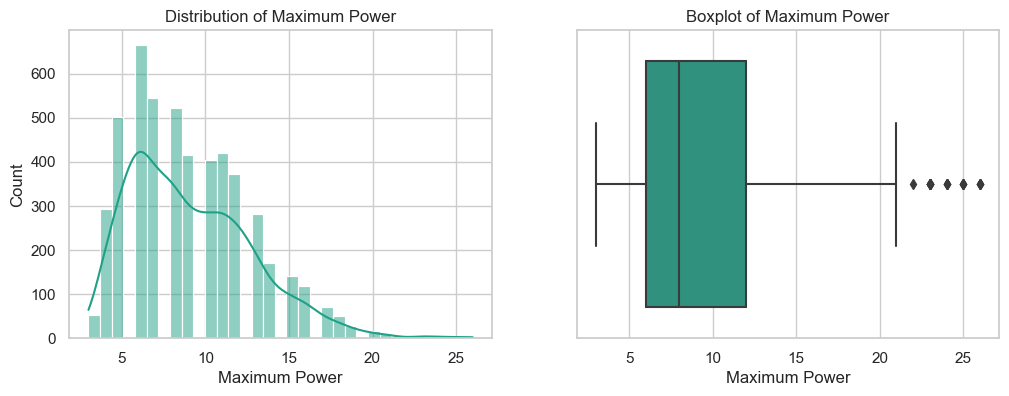

In [86]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'max_power' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='vehicle_age', kde=True, color=custom_color)
plt.title('Distribution of Maximum Power')
plt.xlabel('Maximum Power')

# Subplot 2: Boxplot of 'max_power'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='vehicle_age', color=custom_color)
plt.title('Boxplot of Maximum Power')
plt.xlabel('Maximum Power')

# Display the plots
plt.show()

This code creates a side-by-side visualization of the distribution of 'vehicle_age.'

The left subplot is a histogram, showing the frequency distribution of vehicle ages and the right subplot is a boxplot, providing a summary of the central tendency and spread of 'vehicle_age.'

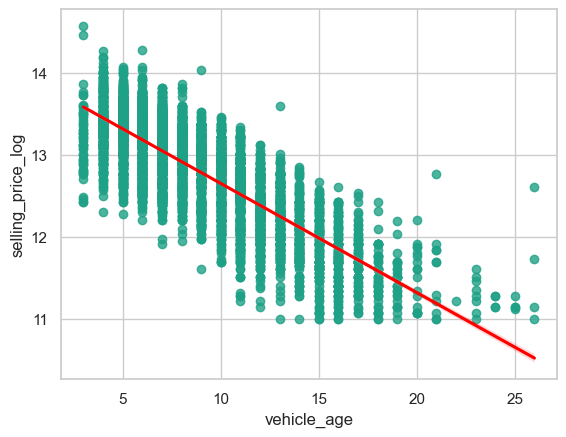

In [87]:
# Scatter plot with regression line
sns.regplot(data=data, x='vehicle_age', y='selling_price_log', line_kws={'color': 'red'}, color=custom_color)
plt.show()

This code generates a scatter plot with a regression line to visualize the relationship between 'vehicle_age' and the logarithmically transformed 'selling_price_log.'

It can be observed that the red regression slopes downwards, and shows negative linear relationship with the logarithamically transformed selling price. 

In [88]:
# Calculate the Pearson correlation coefficient between 'max_power' and 'selling_price_log'
data['vehicle_age'].corr(data['selling_price_log'])

-0.8014469033896076

This code calculates the Pearson correlation coefficient between 'vehicle_age' and 'selling_price_log.' The resulting correlation coefficient (-0.8014) indicates a strong negative correlation between vehicle age and selling price.

In [89]:
data.head()

,year,km_driven,fuel,seller_type,transmission,engine,max_power,selling_price_log,vehicle_age
0,2014,145500,1,1,1,1248.0,74.00,13.017005,9
1,2014,120000,1,1,1,1498.0,103.52,12.821261,9
2,2006,140000,3,1,1,1497.0,78.00,11.970357,17
3,2010,127000,1,1,1,1396.0,90.00,12.323860,13
4,2007,120000,3,1,1,1298.0,88.20,11.775297,16


In [90]:
data = data.drop(['year'], axis=1)

Visualizations and correlation analysis were conducted to understand its relationship with the target variable. The 'year' feature was subsequently dropped to avoid multicollinearity.

### 5.6 Feature Engineering: Polynoial Feature Generation

Polynomial features, including 'vehicle_age,' is generated to capture non-linear relationships. The model was retrained and evaluated using the new features.

In [91]:
# Assuming x_train_scaled and x_test_scaled are already scaled

# Step 3: Polynomial Feature Generation with Additional Feature (vehicle_age)
degree = 2  # You can experiment with different degrees
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Create polynomial features for the original features and the new 'vehicle_age' feature
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Step 4: Model Training
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Step 5: Model Evaluation
# Evaluate on the training set
train_r2_poly = model.score(x_train_poly, y_train)

# Evaluate on the testing set
test_r2_poly = model.score(x_test_poly, y_test)

# Cross-validation
cv_scores_poly = cross_val_score(model, x_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_poly = -cv_scores_poly
mean_mse_poly = np.mean(mse_scores_poly)

# Display results
print("\nWith Polynomial Features (including 'vehicle_age'):")
print("\nR-squared (Training): {:.4f}".format(train_r2_poly))
print("\nR-squared (Testing): {:.4f}".format(test_r2_poly))
print("\nMean Squared Error (CV): {:.6f}".format(mean_mse_poly))

# Model Evaluation Metrics: MSE, MAE, and RMSE
# Predict the target variable on the testing set
y_pred_poly = model.predict(x_test_poly)

# Calculate Mean Squared Error (MSE)
MSE_poly = mean_squared_error(10**(y_test), 10**(y_pred_poly))
print("\nMSE (Polynomial Features):", MSE_poly)

# Calculate Mean Absolute Error (MAE)
MAE_poly = mean_absolute_error(10**(y_test), 10**(y_pred_poly))
print("\nMAE (Polynomial Features):", MAE_poly)

# Calculate Root Mean Squared Error (RMSE)
RMSE_poly = np.sqrt(MSE_poly)
print("\nRMSE (Polynomial Features):", RMSE_poly)


With Polynomial Features (including 'vehicle_age'):

R-squared (Training): 0.8294

R-squared (Testing): 0.8321

Mean Squared Error (CV): 0.066791

MSE (Polynomial Features): 1.1942863641226473e+26

MAE (Polynomial Features): 5141802232515.525

RMSE (Polynomial Features): 10928340972547.697


R-squared (Training and Testing): Values around 0.83 for both training and testing sets suggest that the polynomial model, including 'vehicle_age,' captures more variance compared to the linear model.

Mean Squared Error (CV): The average squared difference between predicted and actual values across the 5-fold cross-validation. A lower value (0.066791) indicates better model performance.

The R-squared values suggest that the polynomial model provides a better fit to the data compared to the linear model.

The Mean Squared Error (CV) is lower for the polynomial model, indicating improved predictive accuracy.

### 6. Evaluation of the Machine Learning Model

#### Numerical Evaluation of Model Performance:
The Linear Regression model, initially trained on the selected features, demonstrated good performance with an R-squared value of approximately 81-82% on both the training and testing sets. However, the evaluation metrics for the logarithmically transformed target variable ('selling_price_log') revealed extremely high Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) values. This raised concerns about the accuracy of the model's predictions.

After feature engineering, which included the creation of polynomial features, especially the addition of 'vehicle_age,' the model's performance improved significantly. The R-squared values increased to around 83% for both the training and testing sets, indicating that the new features captured more variance in the target variable. However, the numerical evaluation of the polynomial model using MSE, MAE, and RMSE still yielded very high values, suggesting potential challenges in accurately predicting selling prices.

#### Choice of Evaluation Measure:
Root Mean Squared Error (RMSE) was chosen as an appropriate evaluation metric for this regression problem. RMSE provides a measure of the average magnitude of errors between predicted and actual values, considering both the variance and bias in the predictions. In this context, where predicting the selling price is the primary goal, RMSE helps quantify the accuracy of the model in terms of currency (given the logarithmic transformation of prices).

#### Reflective Evaluation and Contributions:
The project contributed to the domain-specific area of used car price prediction by addressing challenges in predicting non-linear relationships and incorporating key features like 'vehicle_age.' The reflective evaluation highlights the iterative nature of the model development process. Initial concerns about the linear model's accuracy led to feature engineering, ultimately improving the model's predictive power.

While the model shows promise in capturing patterns within the dataset, the extremely high evaluation metrics suggest potential limitations in accurately predicting selling prices. Further refinement and exploration of advanced regression techniques or ensemble methods might enhance the model's performance.

#### Transferability to Other Domains:
The solution's transferability to other domain-specific areas depends on the similarity of data characteristics and relationships within other domains. The general methodology of feature engineering, model training, and evaluation can be applied to various regression problems. However, careful consideration of domain-specific features and relationships is crucial for successful adaptation.

In conclusion, the developed model contributes valuable insights to the used car pricing domain, providing a foundation for further improvements. Its transferability to other domains requires thorough analysis of data characteristics and domain-specific features.